# Telecom Churn Case Study

## Business Understanding

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
<br><br> 

**Models of Payment**
<br><br>
There are two main models of payment in the telecom industry - **postpaid** (customers pay a monthly/annual bill after using the services) and **prepaid** (customers pay/recharge with a certain amount in advance and then use the services).
<br><br>
In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and we directly know that this is an instance of churn.
<br><br>
However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers.
<br><br>
Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.
`This project is based on the Indian and Southeast Asian market.`

 
<br><br>
**Definitions of Churn**
<br>
There are various ways to define churn, such as:

1. **Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’. The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 
2. **Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if we define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator. 

`This project is based on the usage-based definition to define churn.`


3. **High-value Churn:** In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

<br> 
`In this project, we will predict churn only on high-value customers.`


### Business Objective

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 
`The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. `

 

**Understanding Customer Behaviour During Churn**
<br><br>
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

1. The ‘**good**’ phase: In this phase, the customer is happy with the service and behaves as usual.

2. The ‘**action**’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. The ‘**churn**’ phase: In this phase, the customer is said to have churned. We define churn based on this phase. 


### Goal of Data Analysis

In this project, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase. <br>In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to `identify customers at high risk of churn and identify the main indicators of churn`.

## Data Understanding

In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

#### Import Libraries and data

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [3]:
# Import the dataset

telecom_churn_data = pd.read_csv('telecom_churn_data.csv')

#### Inspect the Dataframe

In [4]:
# Head of the dataset

telecom_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
# Dimensions of the dataframe

telecom_churn_data.shape

(99999, 226)

In [6]:
# Statistical aspects of the dataframe

telecom_churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
# Type of each column

telecom_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


## Data Preparation

### Data Cleaning

In [8]:
# List the column names in the dataset

telecom_churn_data.columns.to_list()

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

It can be seen that in the last four column names the month name is mentioned instead of month number like other columns, so we will rename the four columns with same naming labels as other columns.

In [9]:
# Rename the columns 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g' as 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9'

telecom_churn_data.rename(columns = {'aug_vbc_3g': 'vbc_3g_8', 'jul_vbc_3g': 'vbc_3g_7',
                                     'jun_vbc_3g': 'vbc_3g_6', 'sep_vbc_3g': 'vbc_3g_9'}, inplace =True)

#### Identify Single and Unique value Columns

First of all we can check whether the data contains columns with no value, single value and all different values. Those data can be of no use for this analysis. So we will drop those data.

In [10]:
# Check for columns having no value and single value

drop_cols_0_1_value = list(filter(lambda x : len(telecom_churn_data[x].value_counts()) < 2, telecom_churn_data.columns))
single_values = {}
for col in drop_cols_0_1_value:
    single_values[col] = telecom_churn_data[col].unique()
single_values

{'circle_id': array([109], dtype=int64),
 'loc_og_t2o_mou': array([ 0., nan]),
 'std_og_t2o_mou': array([ 0., nan]),
 'loc_ic_t2o_mou': array([ 0., nan]),
 'last_date_of_month_6': array(['6/30/2014'], dtype=object),
 'last_date_of_month_7': array(['7/31/2014', nan], dtype=object),
 'last_date_of_month_8': array(['8/31/2014', nan], dtype=object),
 'last_date_of_month_9': array(['9/30/2014', nan], dtype=object),
 'std_og_t2c_mou_6': array([nan,  0.]),
 'std_og_t2c_mou_7': array([nan,  0.]),
 'std_og_t2c_mou_8': array([ 0., nan]),
 'std_og_t2c_mou_9': array([nan,  0.]),
 'std_ic_t2o_mou_6': array([nan,  0.]),
 'std_ic_t2o_mou_7': array([nan,  0.]),
 'std_ic_t2o_mou_8': array([ 0., nan]),
 'std_ic_t2o_mou_9': array([nan,  0.])}

It can be seen that the values of the 16 columns are 0 and NaN, so we can remove it.

In [11]:
# Drop columns having no value and single value

telecom_churn_data = telecom_churn_data.drop(drop_cols_0_1_value, axis = 1)

In [12]:
# Check for columns having unique values

drop_cols_unique_value = list(filter(lambda x : len(telecom_churn_data[x].value_counts()) == telecom_churn_data.shape[0], telecom_churn_data.columns))
drop_cols_unique_value

['mobile_number']

In [13]:
# Drop columns having unique values

telecom_churn_data = telecom_churn_data.drop(drop_cols_unique_value, axis = 1)

### Handling Missing Values

In [14]:
# Count of missing values in each column

telecom_churn_data.isnull().sum()

arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou_6             3937
loc_og_t2t_mou_7             3859
loc_og_t2t_mou_8             5378
loc_og_t2t_mou_9             7745
loc_og_t2m_mou_6             3937
loc_og_t2m_mou_7             3859
loc_og_t2m_mou_8             5378
loc_og_t2m_mou_9             7745
loc_og_t2f_mou_6             3937
loc_og_t2f_mou

In [15]:
# Check the percentage of missing values

cols_missing_data = round(100*(telecom_churn_data.isnull().sum()/len(telecom_churn_data.index)), 2)
cols_missing_data[cols_missing_data != 0].sort_values()

date_of_last_rech_6          1.61
date_of_last_rech_7          1.77
date_of_last_rech_8          3.62
std_ic_t2f_mou_7             3.86
loc_og_t2f_mou_7             3.86
og_others_7                  3.86
ic_others_7                  3.86
loc_og_t2c_mou_7             3.86
spl_ic_mou_7                 3.86
spl_og_mou_7                 3.86
loc_og_mou_7                 3.86
isd_og_mou_7                 3.86
std_og_mou_7                 3.86
std_og_t2t_mou_7             3.86
std_og_t2f_mou_7             3.86
std_og_t2m_mou_7             3.86
loc_ic_t2t_mou_7             3.86
loc_ic_t2m_mou_7             3.86
loc_og_t2m_mou_7             3.86
loc_og_t2t_mou_7             3.86
onnet_mou_7                  3.86
std_ic_t2m_mou_7             3.86
std_ic_t2t_mou_7             3.86
offnet_mou_7                 3.86
roam_ic_mou_7                3.86
loc_ic_mou_7                 3.86
isd_ic_mou_7                 3.86
std_ic_mou_7                 3.86
loc_ic_t2f_mou_7             3.86
roam_og_mou_7 

In [16]:
# Columns with more than 70% missing values

cols_missing_data_above_70 = cols_missing_data[cols_missing_data >= 70]
cols_missing_data_above_70

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

When we analyse the missing value percentage, it can be observed that the high percentage of null values are for data related columns and low percentage of null values are for call related columns.This indicate that the customers are using call services instead of data services. Therefore we can impute 0 but we need to analyse the values.

In [17]:
# Check the data of missing columns for June(6) month 

cols_missing_data_above_70_for_6 = [for_6 for for_6 in list(cols_missing_data_above_70.index) if for_6.endswith("_6")]
telecom_churn_data[cols_missing_data_above_70_for_6].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,fb_user_6
0,6/21/2014,1.0,252.0,0.0,1.0,252.0,212.17,212.17,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/4/2014,1.0,56.0,1.0,0.0,56.0,0.00,0.00,0.0,0.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When analysing the missing data of June month, it can be seen that the data recharge date and data recharge amount are missed together so we can assume that the customer did not recharge. Therefore we can impute values rather than dropping the columns. Now we can check the distribution of data for imputing values

In [18]:
# Check for the minimum values for missing data

telecom_churn_data[cols_missing_data_above_70.index].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968
std,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000,0.480000,0.420000,0.880000,2.605000,10.830000,8.810000,9.270000,14.800000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000,122.070000,119.560000,122.070000,140.010000,122.070000,122.070000,122.070000,140.010000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000,6362.280000,4980.900000,3716.900000,13884.310000,6433.760000,4809.360000,3483.170000,3467.170000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Univariate EDA for total_rech_data_*
<br>
Total number of recharge of mobile internet in a month

Text(0.5, 1.0, 'total_rech_data_9')

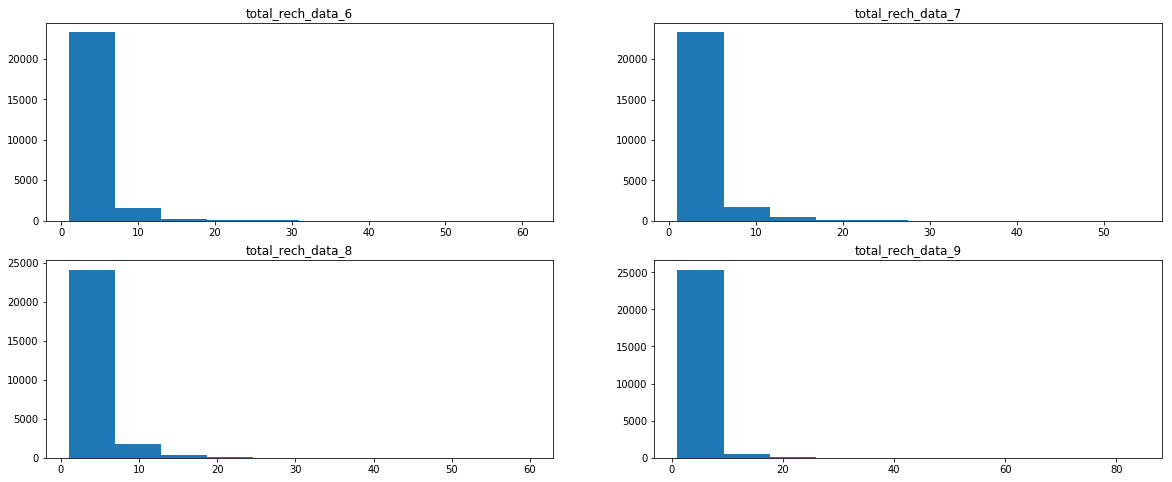

In [19]:
fig = plt.subplots(2, 2, figsize = (20,8))
plt.subplot(2,2,1)
plt.hist(telecom_churn_data['total_rech_data_6'])
plt.title('total_rech_data_6')
plt.subplot(2,2,2)
plt.hist(telecom_churn_data['total_rech_data_7'])
plt.title('total_rech_data_7')
plt.subplot(2,2,3)
plt.hist(telecom_churn_data['total_rech_data_8'])
plt.title('total_rech_data_8')
plt.subplot(2,2,4)
plt.hist(telecom_churn_data['total_rech_data_9'])
plt.title('total_rech_data_9')

It can be seen that the minimum value for total_rech_data_* is 1. So for the data where data recharge is not done we can impute 0. The data conforms to a power law distribution that clumps data at the low end.

#### Univariate EDA for max_rech_data_*
<br>
Maximum recharge amount of mobile internet in a month

Text(0.5, 1.0, 'max_rech_data_9')

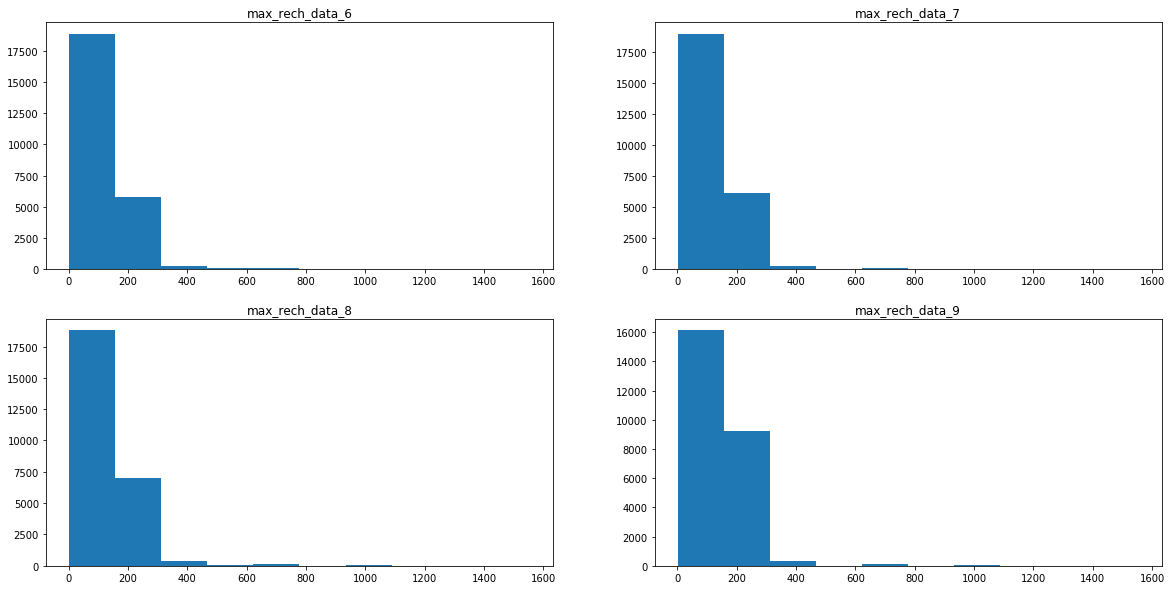

In [20]:
fig = plt.subplots(2, 2, figsize = (20,10))
plt.subplot(2,2,1)
plt.hist(telecom_churn_data['max_rech_data_6'])
plt.title('max_rech_data_6')
plt.subplot(2,2,2)
plt.hist(telecom_churn_data['max_rech_data_7'])
plt.title('max_rech_data_7')
plt.subplot(2,2,3)
plt.hist(telecom_churn_data['max_rech_data_8'])
plt.title('max_rech_data_8')
plt.subplot(2,2,4)
plt.hist(telecom_churn_data['max_rech_data_9'])
plt.title('max_rech_data_9')

It can be seen that the minimum value for max_rech_data_* is 1. So for the data where data recharge is not done we can impute 0. The data conforms to a power law distribution that clumps data at the low end.

#### Univariate EDA for count_rech_2g_*
<br>
Total count of recharge of 2G network in a month

Text(0.5, 1.0, 'count_rech_2g_9')

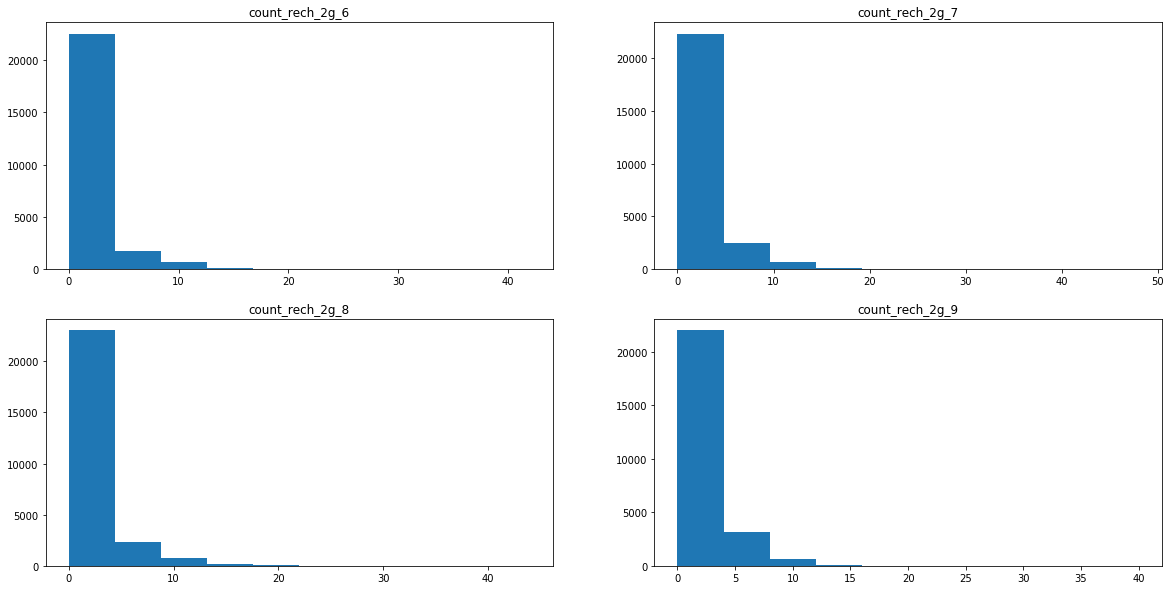

In [21]:
fig = plt.subplots(2, 2, figsize = (20,10))
plt.subplot(2,2,1)
plt.hist(telecom_churn_data['count_rech_2g_6'])
plt.title('count_rech_2g_6')
plt.subplot(2,2,2)
plt.hist(telecom_churn_data['count_rech_2g_7'])
plt.title('count_rech_2g_7')
plt.subplot(2,2,3)
plt.hist(telecom_churn_data['count_rech_2g_8'])
plt.title('count_rech_2g_8')
plt.subplot(2,2,4)
plt.hist(telecom_churn_data['count_rech_2g_9'])
plt.title('count_rech_2g_9')

It can be seen that the minimum value for count_rech_2g_* is 0. So for the data where data recharge is not done we can impute 0. The data conforms to a power law distribution that clumps data at the low end.

#### Univariate EDA for count_rech_3g_*
<br>
Total count of recharge of 3G network in a month

Text(0.5, 1.0, 'count_rech_3g_9')

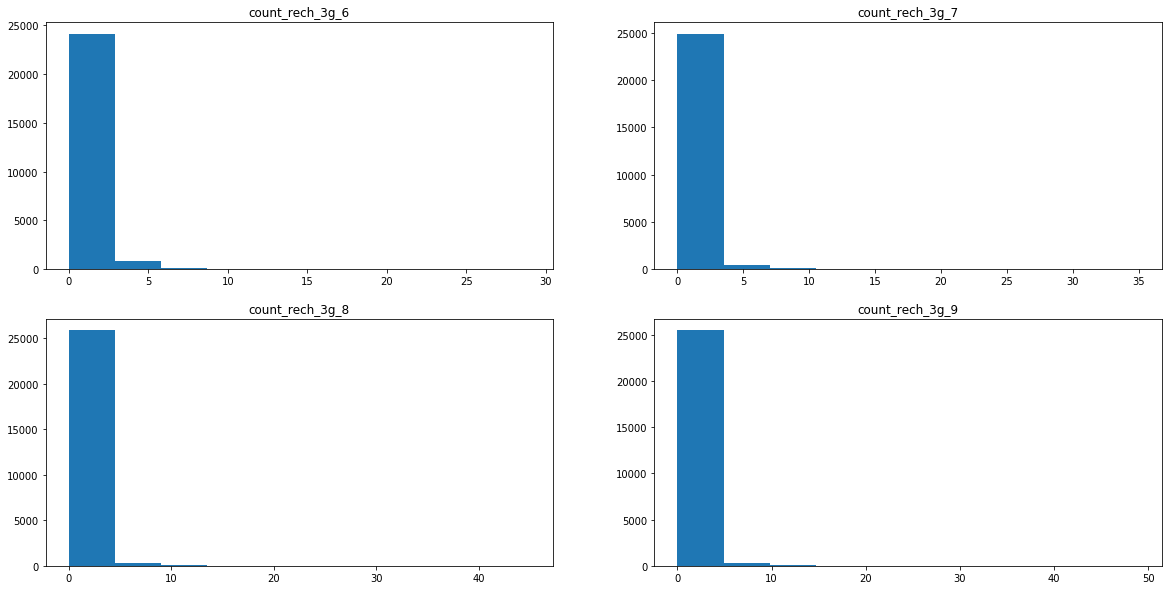

In [22]:
fig = plt.subplots(2, 2, figsize = (20,10))
plt.subplot(2,2,1)
plt.hist(telecom_churn_data['count_rech_3g_6'])
plt.title('count_rech_3g_6')
plt.subplot(2,2,2)
plt.hist(telecom_churn_data['count_rech_3g_7'])
plt.title('count_rech_3g_7')
plt.subplot(2,2,3)
plt.hist(telecom_churn_data['count_rech_3g_8'])
plt.title('count_rech_3g_8')
plt.subplot(2,2,4)
plt.hist(telecom_churn_data['count_rech_3g_9'])
plt.title('count_rech_3g_9')

It can be seen that the minimum value for count_rech_3g_* is 0. So for the data where data recharge is not done we can impute 0. The data conforms to a power law distribution that clumps data at the low end.

#### Univariate EDA for av_rech_amt_data_*
<br>
Average recharge amount of mobile internet in a month

Text(0.5, 1.0, 'av_rech_amt_data_9')

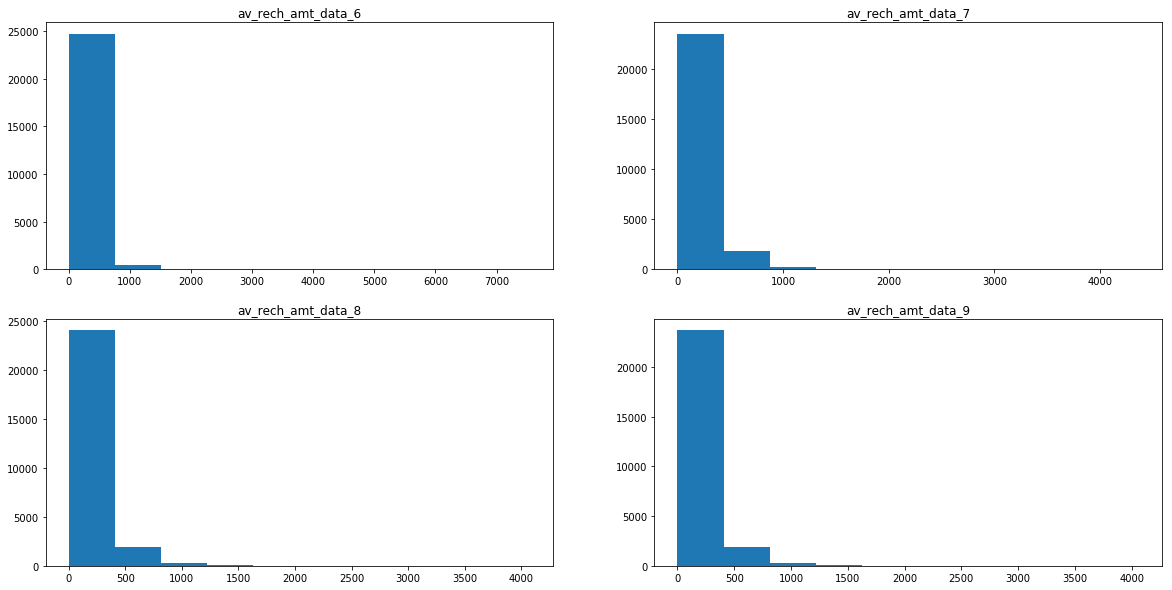

In [23]:
fig = plt.subplots(2, 2, figsize = (20,10))
plt.subplot(2,2,1)
plt.hist(telecom_churn_data['av_rech_amt_data_6'])
plt.title('av_rech_amt_data_6')
plt.subplot(2,2,2)
plt.hist(telecom_churn_data['av_rech_amt_data_7'])
plt.title('av_rech_amt_data_7')
plt.subplot(2,2,3)
plt.hist(telecom_churn_data['av_rech_amt_data_8'])
plt.title('av_rech_amt_data_8')
plt.subplot(2,2,4)
plt.hist(telecom_churn_data['av_rech_amt_data_9'])
plt.title('av_rech_amt_data_9')

It can be seen that the minimum value for av_rech_amt_data_* is 0.5 So for the data where data recharge is not done we can impute 0 as the average recharge amount. The data conforms to a power law distribution that clumps data at the low end.

#### Univariate EDA for arpu_3g_*
<br>
Average revenue per user for 3G network in a month

Text(0.5, 1.0, 'arpu_3g_9')

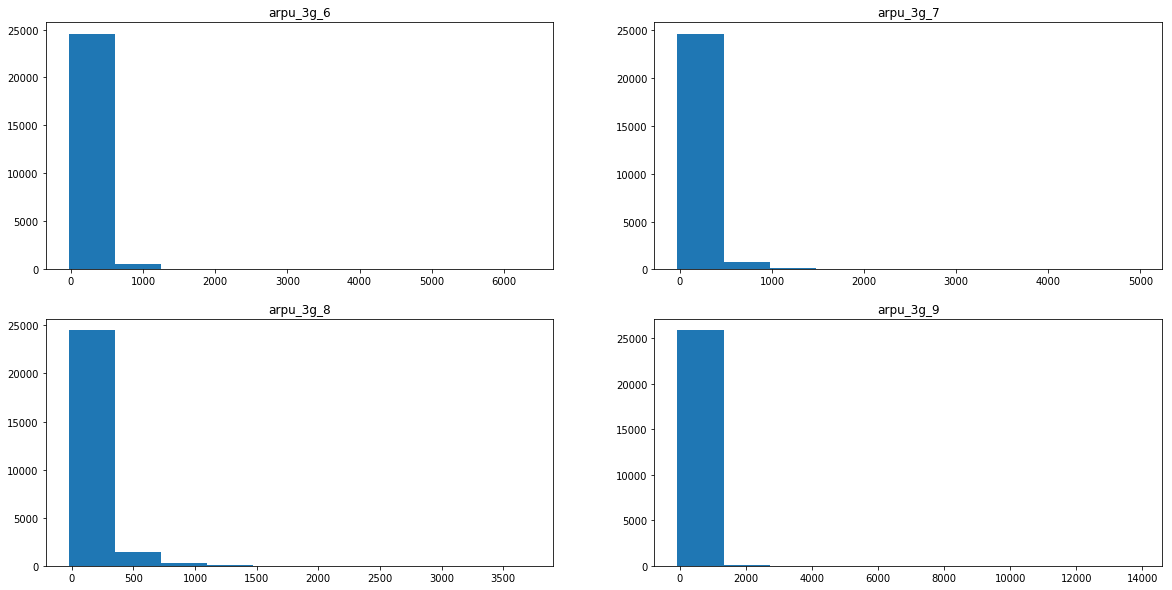

In [24]:
fig = plt.subplots(2, 2, figsize = (20,10))
plt.subplot(2,2,1)
plt.hist(telecom_churn_data['arpu_3g_6'])
plt.title('arpu_3g_6')
plt.subplot(2,2,2)
plt.hist(telecom_churn_data['arpu_3g_7'])
plt.title('arpu_3g_7')
plt.subplot(2,2,3)
plt.hist(telecom_churn_data['arpu_3g_8'])
plt.title('arpu_3g_8')
plt.subplot(2,2,4)
plt.hist(telecom_churn_data['arpu_3g_9'])
plt.title('arpu_3g_9')

It can be seen that the minimum value for arpu_3g_* is negative. This means that some users are making loss to the company. For the data where data recharge is not done we can impute 0 as the average revenue per user. The data conforms to a power law distribution that clumps data at the low end.

#### Univariate EDA for arpu_2g_*
<br>
Average revenue per user for 2G network in a month

Text(0.5, 1.0, 'arpu_2g_9')

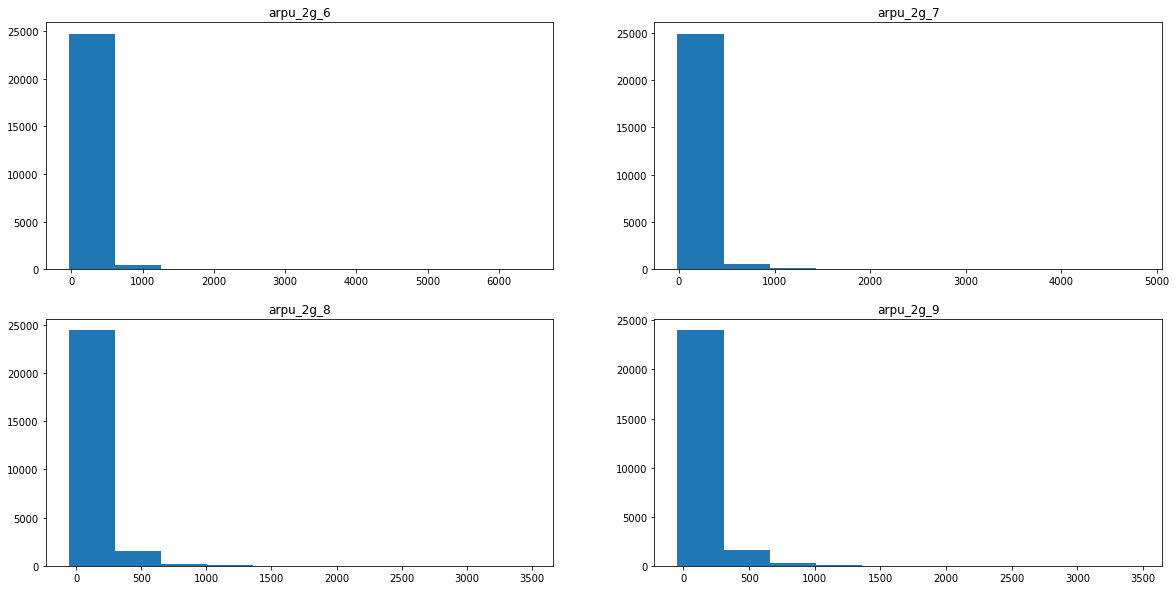

In [25]:
fig = plt.subplots(2, 2, figsize = (20,10))
plt.subplot(2,2,1)
plt.hist(telecom_churn_data['arpu_2g_6'])
plt.title('arpu_2g_6')
plt.subplot(2,2,2)
plt.hist(telecom_churn_data['arpu_2g_7'])
plt.title('arpu_2g_7')
plt.subplot(2,2,3)
plt.hist(telecom_churn_data['arpu_2g_8'])
plt.title('arpu_2g_8')
plt.subplot(2,2,4)
plt.hist(telecom_churn_data['arpu_2g_9'])
plt.title('arpu_2g_9')

It can be seen that the minimum value for arpu_2g_* is negative. This means that some users are making loss to the company. For the data where data recharge is not done we can impute 0 as the average revenue per user. The data conforms to a power law distribution that clumps data at the low end.

#### Univariate EDA for night_pck_user_*
<br>
Scheme to use during specific night hours only

Text(0.5, 1.0, 'night_pck_user_9')

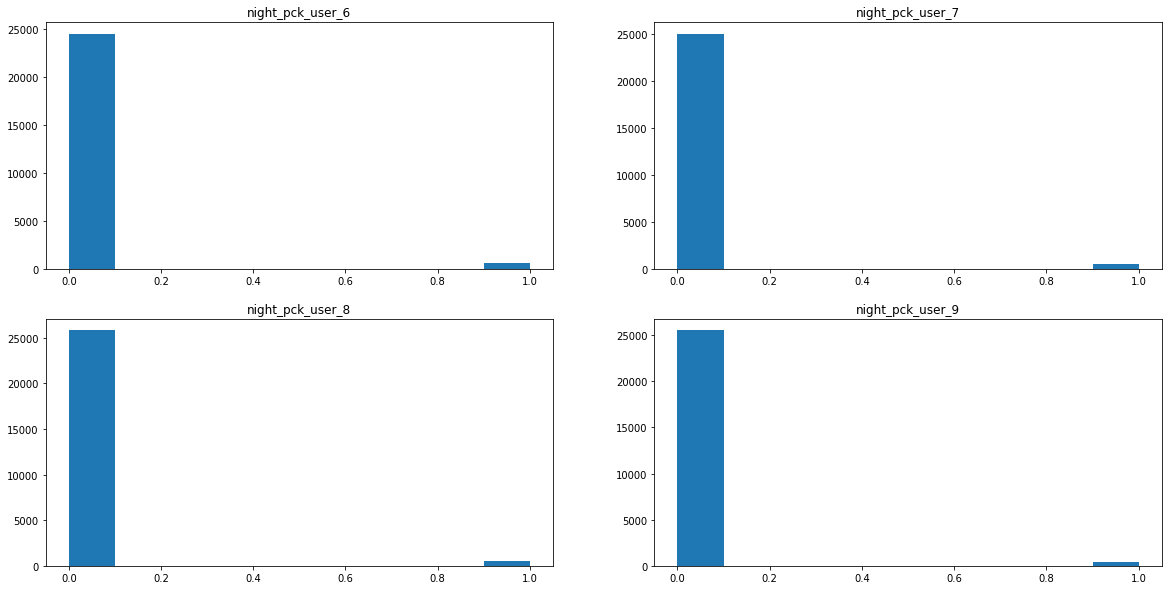

In [26]:
fig = plt.subplots(2, 2, figsize = (20,10))
plt.subplot(2,2,1)
plt.hist(telecom_churn_data['night_pck_user_6'])
plt.title('night_pck_user_6')
plt.subplot(2,2,2)
plt.hist(telecom_churn_data['night_pck_user_7'])
plt.title('night_pck_user_7')
plt.subplot(2,2,3)
plt.hist(telecom_churn_data['night_pck_user_8'])
plt.title('night_pck_user_8')
plt.subplot(2,2,4)
plt.hist(telecom_churn_data['night_pck_user_9'])
plt.title('night_pck_user_9')

It can be seen that the values for night_pck_user_* are 0 and 1. Even though the values are numeric, they correspond to yes and no values. That is, customers using and not using the facility. So imputing 0 or 1 will introduce bias so we consider this column as categorical variable and introduce a new field with value of -1. We can see that a very high percentage of customers did not opt for night pack in all four months.

#### Univariate EDA for fb_user_*
<br>
Service scheme to avail services of Facebook and similar social networking sites

Text(0.5, 1.0, 'fb_user_9')

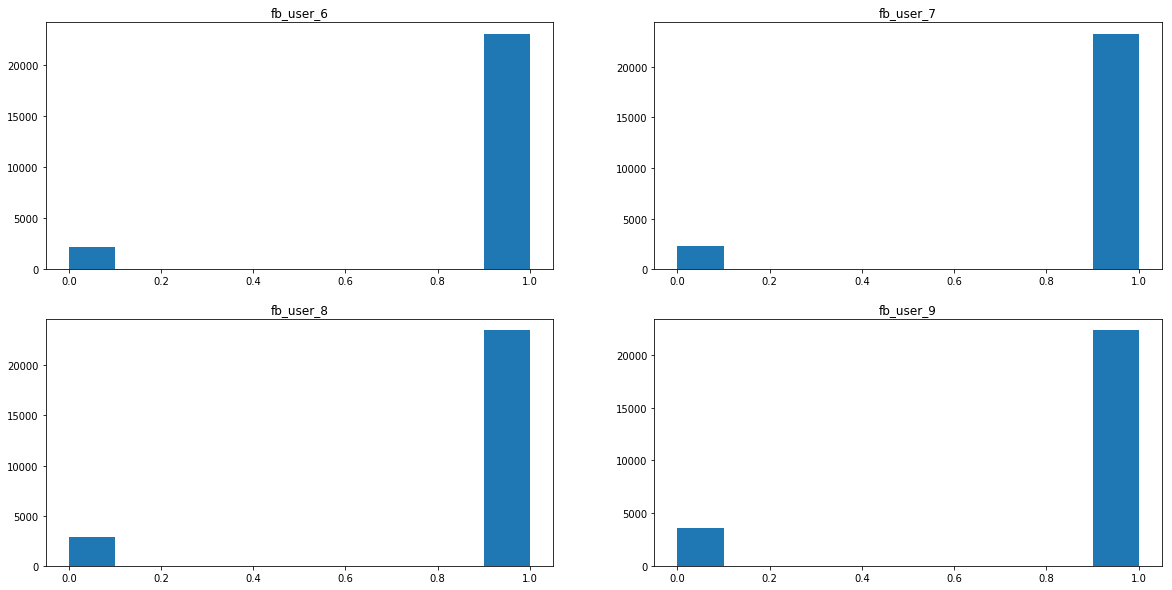

In [27]:
fig = plt.subplots(2, 2, figsize = (20,10))
plt.subplot(2,2,1)
plt.hist(telecom_churn_data['fb_user_6'])
plt.title('fb_user_6')
plt.subplot(2,2,2)
plt.hist(telecom_churn_data['fb_user_7'])
plt.title('fb_user_7')
plt.subplot(2,2,3)
plt.hist(telecom_churn_data['fb_user_8'])
plt.title('fb_user_8')
plt.subplot(2,2,4)
plt.hist(telecom_churn_data['fb_user_9'])
plt.title('fb_user_9')

It can be seen that the values for fb_user_* are 0 and 1. Even though the values are numeric, they correspond to yes and no values. That is, customers using and not using the facility. So imputing 0 or 1 will introduce bias so we consider this column as categorical variable and introduce a new field with value of -1. We can see that a very high percentage of customers opted for Facebook and other social networking sites pack in all four months.

#### Impute zero for total_rech_data_, max_rech_data_, count_rech_2g_, count_rech_3g_, av_rech_amt_data_

In [28]:
cols_for_impute_0 = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                     'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 
                     'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 
                     'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 
                     'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                     'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9',
                    'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']

telecom_churn_data[cols_for_impute_0] = telecom_churn_data[cols_for_impute_0].apply(lambda x: x.fillna(0))

#### Impute new field(-1) for night_pck_user_, fb_user_

In [29]:
cols_for_impute_1 = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
                     'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

telecom_churn_data[cols_for_impute_1] = telecom_churn_data[cols_for_impute_1].apply(lambda x: x.fillna(-1))

As the customer did not recharge mobile internet, imputing more than 70% missing values for date columns is not possible so we can drop the date columns 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'.

In [30]:
# Drop columns 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'

drop_cols =['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']

telecom_churn_data = telecom_churn_data.drop(drop_cols, axis = 1)

In [31]:
# Dataset information after handling more than 70% missing values

telecom_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 205 entries, arpu_6 to vbc_3g_9
dtypes: float64(168), int64(33), object(4)
memory usage: 156.4+ MB


In [32]:
# Check the percentage of missing values

cols_missing_data = round(100*(telecom_churn_data.isnull().sum()/len(telecom_churn_data.index)), 2)
cols_missing_data[cols_missing_data != 0].sort_values()

date_of_last_rech_6    1.61
date_of_last_rech_7    1.77
date_of_last_rech_8    3.62
loc_ic_t2f_mou_7       3.86
loc_og_t2c_mou_7       3.86
std_og_t2m_mou_7       3.86
std_ic_t2m_mou_7       3.86
loc_og_t2f_mou_7       3.86
loc_og_mou_7           3.86
std_og_t2f_mou_7       3.86
std_ic_t2f_mou_7       3.86
loc_og_t2m_mou_7       3.86
loc_ic_t2t_mou_7       3.86
std_og_t2t_mou_7       3.86
std_ic_mou_7           3.86
loc_og_t2t_mou_7       3.86
std_og_mou_7           3.86
std_ic_t2t_mou_7       3.86
spl_ic_mou_7           3.86
roam_og_mou_7          3.86
og_others_7            3.86
isd_ic_mou_7           3.86
roam_ic_mou_7          3.86
isd_og_mou_7           3.86
ic_others_7            3.86
offnet_mou_7           3.86
spl_og_mou_7           3.86
onnet_mou_7            3.86
loc_ic_mou_7           3.86
loc_ic_t2m_mou_7       3.86
std_og_t2m_mou_6       3.94
loc_ic_t2f_mou_6       3.94
onnet_mou_6            3.94
std_og_t2f_mou_6       3.94
std_og_mou_6           3.94
og_others_6         

We can see that the percentage of missing values is same for columns in a month so we need to further analyse the month-wise data. We can analyse row-wise missing data for each month to conclude whether we need to impute the values or drop the values. 

In [33]:
# Check the percentage of missing values along rows

cols_missing_data = telecom_churn_data.isnull().sum(axis = 1)
cols_missing_data[cols_missing_data != 0].sort_values()

20215      1
88621      1
65321      1
65310      1
65279      1
49174      1
49183      1
88624      1
34128      1
65217      1
96833      1
49189      1
93838      1
18717      1
65169      1
49217      1
18746      1
18748      1
18762      1
18766      1
65109      1
93843      1
96823      1
65102      1
34053      1
65075      1
65019      1
93848      1
91360      1
18908      1
18615      1
18921      1
34145      1
65348      1
18341      1
18346      1
96885      1
18372      1
88584      1
91371      1
34194      1
49067      1
18408      1
49078      1
65490      1
96879      1
65489      1
65485      1
18451      1
65454      1
34171      1
65440      1
49116      1
18508      1
96852      1
18546      1
91368      1
65430      1
49164      1
65407      1
65397      1
65392      1
65381      1
65334      1
65587      1
65005      1
18932      1
19196      1
64661      1
88700      1
19222      1
49427      1
49454      1
64629      1
33851      1
64621      1
19268      1

In [34]:
# Missing Data for June Month

cols_for_6 = [for_6 for for_6 in list(telecom_churn_data.columns) if for_6.endswith("_6")]
telecom_churn_data[cols_for_6][telecom_churn_data[cols_for_6].isnull().any(axis = 1)].head()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rch_amt_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6,vbc_3g_6
0,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4,362,252,6/21/2014,252,1.0,252.0,0.0,1.0,252.0,30.13,83.57,212.17,212.17,0.0,0,0,1,0,1.0,101.2
15,31.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,0,0,6/14/2014,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-1.0,0,0,0,0,-1.0,0.0
26,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-1.0,0,0,0,0,-1.0,0.0
37,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2,0,0,6/17/2014,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-1.0,0,0,0,0,-1.0,0.0
51,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,0,0,6/21/2014,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-1.0,0,0,0,0,-1.0,0.0


In [35]:
# Missing Data for July Month

cols_for_7 = [for_7 for for_7 in list(telecom_churn_data.columns) if for_7.endswith("_7")]
telecom_churn_data[cols_for_7][telecom_churn_data[cols_for_7].isnull().any(axis = 1)].head()

,arpu_7,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_mou_7,total_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,last_day_rch_amt_7,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,monthly_2g_7,sachet_2g_7,monthly_3g_7,sachet_3g_7,fb_user_7,vbc_3g_7
0,214.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,3,252,252,7/16/2014,252,1.0,252.0,0.0,1.0,252.0,1.32,150.76,212.17,212.17,0.0,0,0,1,0,1.0,0.0
10,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,1,0,0,7/5/2014,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-1.0,0,0,0,0,-1.0,0.0
35,13.448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,2,0,0,7/3/2014,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-1.0,0,0,0,0,-1.0,0.0
45,7.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,5,0,0,7/25/2014,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-1.0,0,0,0,0,-1.0,0.0
52,0.000,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,0.0,0.0,0.51,0,0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-1.0,0,0,0,0,-1.0,0.0


In [36]:
# Missing Data for August Month

cols_for_8 = [for_8 for for_8 in list(telecom_churn_data.columns) if for_8.endswith("_8")]
telecom_churn_data[cols_for_8][telecom_churn_data[cols_for_8].isnull().any(axis = 1)].head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,vbc_3g_8
35,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,1,0,0,8/2/2014,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,-1.0,0.0
45,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,1,0,0,8/5/2014,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,-1.0,0.0
111,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,5,0,0,8/24/2014,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,-1.0,0.0
121,6.152,1.75,0.45,0.0,0.0,1.75,0.45,0.0,0.0,2.2,0.0,0.0,0.0,0.0,0.0,1.48,0.0,3.68,9.31,16.48,22.43,48.23,0.0,4.54,1.74,6.29,54.53,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,-1.0,0.0
129,-5.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,3,0,0,8/24/2014,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,-1.0,0.0


In [37]:
# Missing Data for September Month

cols_for_9 = [for_9 for for_9 in list(telecom_churn_data.columns) if for_9.endswith("_9")]
telecom_churn_data[cols_for_9][telecom_churn_data[cols_for_9].isnull().any(axis = 1)].head()

,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,fb_user_9,vbc_3g_9
0,21.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,6,0,0,9/28/2014,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,-1.0,3.58
7,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,3,0,0,9/30/2014,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,-1.0,0.00
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.01,24.26,83.96,0.61,108.84,18.99,18.18,0.0,37.18,146.03,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,-1.0,0.00
29,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,1,0,0,9/6/2014,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,-1.0,0.00
32,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,4,0,0,9/28/2014,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,-1.0,0.00


When analysing the data for each month, it can be observed that the call datas are missing even though call recharge has been done. It can be concluded that dropping the rows or imputing 0 is a bad idea as the call recharge details are present in the data. So we can impute values using IterativeImputer. 
<br>
Also, it can be observed that the some missing value columns has missing recharge date so it can be imputed with 0 as it can be assumed that the call recharge was not done.

#### Impute zero for columns in a month where call recharge date is missing

In [38]:
# Impute zero for columns in June month where call recharge date is missing

cols_for_6.remove('date_of_last_rech_6') 
for cols in cols_for_6:
    telecom_churn_data[cols][telecom_churn_data['date_of_last_rech_6'].isnull()] = 0

In [39]:
# Impute zero for columns in July month where call recharge date is missing

cols_for_7.remove('date_of_last_rech_7') 
for cols in cols_for_7:
    telecom_churn_data[cols][telecom_churn_data['date_of_last_rech_7'].isnull()] = 0

In [40]:
# Impute zero for columns in August month where call recharge date is missing

cols_for_8.remove('date_of_last_rech_8') 
for cols in cols_for_8:
    telecom_churn_data[cols][telecom_churn_data['date_of_last_rech_8'].isnull()] = 0

In [41]:
# Impute zero for columns in September month where call recharge date is missing

cols_for_9.remove('date_of_last_rech_9') 
for cols in cols_for_9:
    telecom_churn_data[cols][telecom_churn_data['date_of_last_rech_9'].isnull()] = 0

In [42]:
# Check the 'object' datatype columns

telecom_churn_data.select_dtypes(include='object').head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,6/21/2014,7/16/2014,8/8/2014,9/28/2014
1,6/29/2014,7/31/2014,8/28/2014,9/30/2014
2,6/17/2014,7/24/2014,8/14/2014,9/29/2014
3,6/28/2014,7/31/2014,8/31/2014,9/30/2014
4,6/26/2014,7/28/2014,8/9/2014,9/28/2014


The 'object' datatype columns have only Date data. As these date columns does not provide any details for our analysis, we can drop those columns from further analysis.

In [43]:
# Select the numeric data for imputation

telecom_churn_data_with_missing = pd.DataFrame(telecom_churn_data.select_dtypes(include=['float64', 'int64']))

#### Impute values using IterativeImputer
<br>
IterativeImputer is a Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

In [44]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

In [45]:
# Initialize the IterativeImputer

imputer = IterativeImputer(initial_strategy = 'median', random_state=10, verbose = 2, max_iter=3, tol = 0.01)

In [46]:
# Fit and Transform the data

telecom_churn_data_without_missing = imputer.fit_transform(telecom_churn_data_with_missing)

[IterativeImputer] Completing matrix with shape (99999, 201)
[IterativeImputer] Ending imputation round 1/3, elapsed time 492.96
[IterativeImputer] Change: 1815.2100186803525, scaled tolerance: 457.35400000000004 
[IterativeImputer] Ending imputation round 2/3, elapsed time 984.09
[IterativeImputer] Change: 803.3916454821456, scaled tolerance: 457.35400000000004 
[IterativeImputer] Ending imputation round 3/3, elapsed time 1474.60
[IterativeImputer] Change: 348.12079621338563, scaled tolerance: 457.35400000000004 
[IterativeImputer] Early stopping criterion reached.


In [47]:
# Convert the imputed dataset to DataFrame

telecom_churn_data_after_impute = pd.DataFrame(telecom_churn_data_without_missing, 
                                               columns =  telecom_churn_data_with_missing.columns)
telecom_churn_data_after_impute.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,197.385,214.816,213.803,21.100,-68.82812,-49.315162,0.00,-57.439454,77.498123,59.678282,0.00,57.172737,13.144898,7.546213,0.00,3.192712,-0.70024,-7.823041,0.00,-7.005173,-6.804505,-11.006108,0.00,-7.652904,40.131691,39.289225,0.00,35.827169,0.005792,-0.001042,0.00,-0.000013,0.322165,-1.448508,0.00,-0.844336,29.504867,25.198429,0.00,24.198743,-2.925889,-3.343345,0.00,-3.823938,3.627111,3.219093,0.00,1.704406,-0.010263,0.024233,0.00,-0.00009,-0.735968,-1.15371,0.00,-3.451128,-28.173757,-23.565871,0.0,-20.422832,-0.001994,-0.001504,0.00,-0.002315,-0.002779,0.004334,0.0,0.000575,0.00,0.00,0.00,0.00,-12.932124,-14.835197,0.16,-11.93822,55.285293,55.661108,4.13,52.263416,0.804032,0.838433,1.15,0.708832,41.589126,40.403103,5.44,39.503854,-10.558829,-10.801857,0.00,-9.952067,1.880666,1.860674,0.00,1.289289,-0.000421,-0.000451,0.00,0.000378,-9.309102,-9.448787,0.00,-9.250946,0.00,0.00,5.44,0.00,-31.562368,-30.421815,0.0,-29.748618,0.04507,-0.125319,0.0,0.007179,-0.000156,-0.00018,0.0,0.00005,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252

In [48]:
# Check for missing columns after imputation

cols_missing_data = round(100*(telecom_churn_data_after_impute.isnull().sum()/len(telecom_churn_data_after_impute.index)), 2)
cols_missing_data[cols_missing_data != 0]

Series([], dtype: float64)

After using Iterativeimputer it can be seen that the data is free of missing values.

In [49]:
# Dataset information after imputation

telecom_churn_data_after_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 201 entries, arpu_6 to vbc_3g_9
dtypes: float64(201)
memory usage: 153.3 MB


After handling missing values, we can save the data. And then filter the high value customers and tag churners.

In [50]:
#Save the data after handling misssing data 

telecom_churn_data_after_impute.to_csv('./telecom_churn_data_cleaned.csv', index = False)

## Filter High-Value Customers

In [51]:
# Read the cleaned data

telecom_churn_data = pd.read_csv('./telecom_churn_data_cleaned.csv')

telecom_churn_data.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,197.385,214.816,213.803,21.100,-68.82812,-49.315162,0.00,-57.439454,77.498123,59.678282,0.00,57.172737,13.144898,7.546213,0.00,3.192712,-0.70024,-7.823041,0.00,-7.005173,-6.804505,-11.006108,0.00,-7.652904,40.131691,39.289225,0.00,35.827169,0.005792,-0.001042,0.00,-0.000013,0.322165,-1.448508,0.00,-0.844336,29.504867,25.198429,0.00,24.198743,-2.925889,-3.343345,0.00,-3.823938,3.627111,3.219093,0.00,1.704406,-0.010263,0.024233,0.00,-0.00009,-0.735968,-1.15371,0.00,-3.451128,-28.173757,-23.565871,0.0,-20.422832,-0.001994,-0.001504,0.00,-0.002315,-0.002779,0.004334,0.0,0.000575,0.00,0.00,0.00,0.00,-12.932124,-14.835197,0.16,-11.93822,55.285293,55.661108,4.13,52.263416,0.804032,0.838433,1.15,0.708832,41.589126,40.403103,5.44,39.503854,-10.558829,-10.801857,0.00,-9.952067,1.880666,1.860674,0.00,1.289289,-0.000421,-0.000451,0.00,0.000378,-9.309102,-9.448787,0.00,-9.250946,0.00,0.00,5.44,0.00,-31.562368,-30.421815,0.0,-29.748618,0.04507,-0.125319,0.0,0.007179,-0.000156,-0.00018,0.0,0.00005,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252

As we need to predict churn only for the high-value customers we need to filter the data. High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

#### Total Data Recharge Amount for Good Phase

In [52]:
### Total data recharge amount for June and July (good phase) --> number of recharges * average recharge amount

telecom_churn_data['total_data_rech_amt_6'] = telecom_churn_data['total_rech_data_6'] * telecom_churn_data['av_rech_amt_data_6']

telecom_churn_data['total_data_rech_amt_7'] = telecom_churn_data['total_rech_data_7'] * telecom_churn_data['av_rech_amt_data_7']

#### Total Recharge Amount for Good Phase

In [53]:
### Total recharge amount for June and July (good phase) --> call recharge amount + data recharge amount

telecom_churn_data['total_amt_6'] = telecom_churn_data[['total_rech_amt_6', 'total_data_rech_amt_7']].sum(axis=1)

telecom_churn_data['total_amt_7'] = telecom_churn_data[['total_rech_amt_7', 'total_data_rech_amt_7']].sum(axis=1)

#### Average recharge for Good Phase

In [54]:
# Average recharge in June and July (good phase) --> Total recharge amount for June + Total recharge amount for July

telecom_churn_data['av_amt_6_7'] = (telecom_churn_data[['total_amt_6', 'total_amt_7']].sum(axis=1)) / 2

In [55]:
print('The 70th percentile value is ', telecom_churn_data['av_amt_6_7'].quantile(0.7))

The 70th percentile value is  467.0


In [56]:
# Retain customers who have recharged their mobiles with more than or equal to 70th percentile of average amount

telecom_churn_data_filtered = telecom_churn_data[(telecom_churn_data['av_amt_6_7'] > telecom_churn_data['av_amt_6_7'].quantile(0.7))]

In [57]:
# Dataset details

telecom_churn_data_filtered.shape

(29982, 206)

Drop columns created for filtering High Value Customers.

In [58]:
# Drop columns created for filtering High Value Customers

drop_cols = ['total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_amt_6', 'total_amt_7', 'av_amt_6_7']
telecom_churn_data_filtered.drop(drop_cols, axis =1, inplace = True)

In [59]:
# Dataset Information

telecom_churn_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29982 entries, 0 to 99997
Columns: 201 entries, arpu_6 to vbc_3g_9
dtypes: float64(201)
memory usage: 46.2 MB


## Tag churners

Now, we need to tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are: `total_ic_mou_9`, `total_og_mou_9`, `vol_2g_mb_9`, `vol_3g_mb_9`.

In [60]:
# Total calls for September month --> Total incoming minutes of usage + Total incoming minutes of usage

telecom_churn_data_filtered['total_calls_mou_9'] = telecom_churn_data_filtered['total_ic_mou_9'] + telecom_churn_data_filtered['total_og_mou_9']

In [61]:
# Total mobile internet for September month --> Volume of 2G mobile internet usage + Volume of 3G mobile internet usage

telecom_churn_data_filtered['total_data_vol_mb_9'] = telecom_churn_data_filtered['vol_2g_mb_9'] + telecom_churn_data_filtered['vol_3g_mb_9']

In [62]:
# Tag churners as 1 else 0

telecom_churn_data_filtered['churn'] = np.where(((telecom_churn_data_filtered['total_calls_mou_9'] == 0) & (telecom_churn_data_filtered['total_data_vol_mb_9'] == 0)), 1, 0)

In [63]:
telecom_churn_data_filtered.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_calls_mou_9,total_data_vol_mb_9,churn
0,197.385,214.816,213.803,21.100,-68.82812,-49.315162,0.00,-57.439454,77.498123,59.678282,0.00,57.172737,13.144898,7.546213,0.00,3.192712,-0.70024,-7.823041,0.00,-7.005173,-6.804505,-11.006108,0.00,-7.652904,40.131691,39.289225,0.00,35.827169,0.005792,-0.001042,0.00,-0.000013,0.322165,-1.448508,0.00,-0.844336,29.504867,25.198429,0.00,24.198743,-2.925889,-3.343345,0.00,-3.823938,3.627111,3.219093,0.00,1.704406,-0.010263,0.024233,0.00,-0.000090,-0.735968,-1.15371,0.00,-3.451128,-28.173757,-23.565871,0.00,-20.422832,-0.001994,-0.001504,0.00,-0.002315,-0.002779,0.004334,0.0,0.000575,0.00,0.00,0.00,0.00,-12.932124,-14.835197,0.16,-11.93822,55.285293,55.661108,4.13,52.263416,0.804032,0.838433,1.15,0.708832,41.589126,40.403103,5.44,39.503854,-10.558829,-10.801857,0.00,-9.952067,1.880666,1.860674,0.00,1.289289,-0.000421,-0.000451,0.00,0.000378,-9.309102,-9.448787,0.00,-9.250946,0.00,0.00,5.44,0.00,-31.562368,-30.421815,0.0,-29.748618,0.04507,-0.125319,0.00,0.007179,-0.000156,-0.00018,0.00,0.000050,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.

Drop columns created for tagging churners.

In [64]:
# Drop columns created for tagging churners

drop_cols = ['total_calls_mou_9', 'total_data_vol_mb_9']
telecom_churn_data_filtered.drop(drop_cols, axis =1, inplace = True)

In [65]:
# Dataset Information

telecom_churn_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29982 entries, 0 to 99997
Columns: 202 entries, arpu_6 to churn
dtypes: float64(201), int32(1)
memory usage: 46.3 MB


## Remove attributes of the churn phase

After tagging churners, we need toremove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [66]:
# Remove the attributes of the churn phase, i.e, details of September month

cols_for_9 = [for_9 for for_9 in list(telecom_churn_data_filtered.columns) if for_9.endswith("_9")]
telecom_churn_data_filtered.drop(cols_for_9, axis =1, inplace = True)

In [67]:
# Dataset Information

telecom_churn_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29982 entries, 0 to 99997
Columns: 152 entries, arpu_6 to churn
dtypes: float64(151), int32(1)
memory usage: 34.9 MB


After filtering the High Value Customers, tagging churners and removing the attributes of September month, we can save the data. Then we can do Data Preparation.

In [68]:
#Save the data after filtering and tagging churners

telecom_churn_data_filtered.to_csv('./telecom_churn_data_filtered.csv', index = False)

## Data Preparation

In [69]:
# Read the filtered data

telecom_churn_data = pd.read_csv('./telecom_churn_data_filtered.csv')

telecom_churn_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,197.385,214.816,213.803,-68.82812,-49.315162,0.00,77.498123,59.678282,0.00,13.144898,7.546213,0.00,-0.70024,-7.823041,0.00,-6.804505,-11.006108,0.00,40.131691,39.289225,0.00,0.005792,-0.001042,0.00,0.322165,-1.448508,0.00,29.504867,25.198429,0.00,-2.925889,-3.343345,0.00,3.627111,3.219093,0.00,-0.010263,0.024233,0.00,-0.735968,-1.15371,0.00,-28.173757,-23.565871,0.00,-0.001994,-0.001504,0.00,-0.002779,0.004334,0.0,0.00,0.00,0.00,-12.932124,-14.835197,0.16,55.285293,55.661108,4.13,0.804032,0.838433,1.15,41.589126,40.403103,5.44,-10.558829,-10.801857,0.00,1.880666,1.860674,0.00,-0.000421,-0.000451,0.00,-9.309102,-9.448787,0.00,0.00,0.00,5.44,-31.562368,-30.421815,0.0,0.04507,-0.125319,0.00,-0.000156,-0.00018,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1
1,1069.180,1349.850,3171.480,57.84000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.74000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.860000,75.14000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.06000,14.530000,31.59,15.740000,15.19000,15.14,5.0,5.0,7.0,158

### Derived Variables

In this analysis we are interested in usage based churn, so we can analyse the usage difference between the average of good phase(June and July month) and the action phase(August month). 

#### onnet_mou_diff

In [70]:
# Onnet Minutes of Usage Difference

telecom_churn_data['onnet_mou_diff'] = telecom_churn_data['onnet_mou_8']-((telecom_churn_data['onnet_mou_6'] + telecom_churn_data['onnet_mou_7'])/2)

#### offnet_mou_diff

In [71]:
# Offnet Minutes of Usage Difference

telecom_churn_data['offnet_mou_diff'] = telecom_churn_data['offnet_mou_8']-((telecom_churn_data['offnet_mou_6'] + telecom_churn_data['offnet_mou_7'])/2)

#### total_og_mou_diff

In [72]:
# Total Outgoing Minutes of Usage Difference

telecom_churn_data['total_og_mou_diff'] = telecom_churn_data['total_og_mou_8']-((telecom_churn_data['total_og_mou_6'] + telecom_churn_data['total_og_mou_7'])/2)

#### total_ic_mou_diff

In [73]:
# Total Incoming Minutes of Usage Difference

telecom_churn_data['total_ic_mou_diff'] = telecom_churn_data['total_ic_mou_8']-((telecom_churn_data['total_ic_mou_6'] + telecom_churn_data['total_ic_mou_7'])/2)

#### total_rech_num_diff

In [74]:
# Total number of call recharge Difference

telecom_churn_data['total_rech_num_diff'] = telecom_churn_data['total_rech_num_8']-((telecom_churn_data['total_rech_num_6'] + telecom_churn_data['total_rech_num_7'])/2)

#### total_rech_data_diff

In [75]:
# Total number of data recharge Difference

telecom_churn_data['total_rech_data_diff'] = telecom_churn_data['total_rech_data_8']-((telecom_churn_data['total_rech_data_6'] + telecom_churn_data['total_rech_data_7'])/2)

#### vol_2g_mb_diff

In [76]:
# 2G Mobile Internet volume Difference

telecom_churn_data['vol_2g_mb_diff'] = telecom_churn_data['vol_2g_mb_8']-((telecom_churn_data['vol_2g_mb_6'] + telecom_churn_data['vol_2g_mb_7'])/2)

#### vol_3g_mb_diff

In [77]:
# 3G Mobile Internet volume Difference

telecom_churn_data['vol_3g_mb_diff'] = telecom_churn_data['vol_3g_mb_8']-((telecom_churn_data['vol_3g_mb_6'] + telecom_churn_data['vol_3g_mb_7'])/2)

#### aon_years

In [78]:
# Age on network is the number of days the customer is using the operator T network.
# It can be converted to years.

telecom_churn_data['aon_years'] = np.round(telecom_churn_data['aon']/365,1)

## Exploratory Data Analysis

#### Univariate Analysis

#### churn

Text(0, 0.5, '% of Churn')

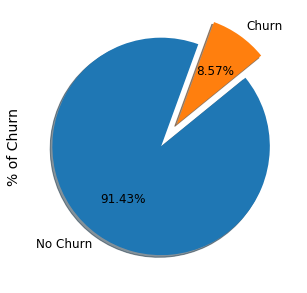

In [79]:
## Plot percentage of Churn
plt.figure(figsize = (10,5))
ax = telecom_churn_data.churn.value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, 
                                             labels=["No Churn", "Churn"], fontsize=12, startangle=70)
ax.set_ylabel('% of Churn', fontsize=14)

From this plot that there is a class imbalance. Customers who have churned is 8.57% and Customers who have not churned is 91.43%.

#### onnet_mou_*

Text(0.5, 1.0, 'onnet_mou_8')

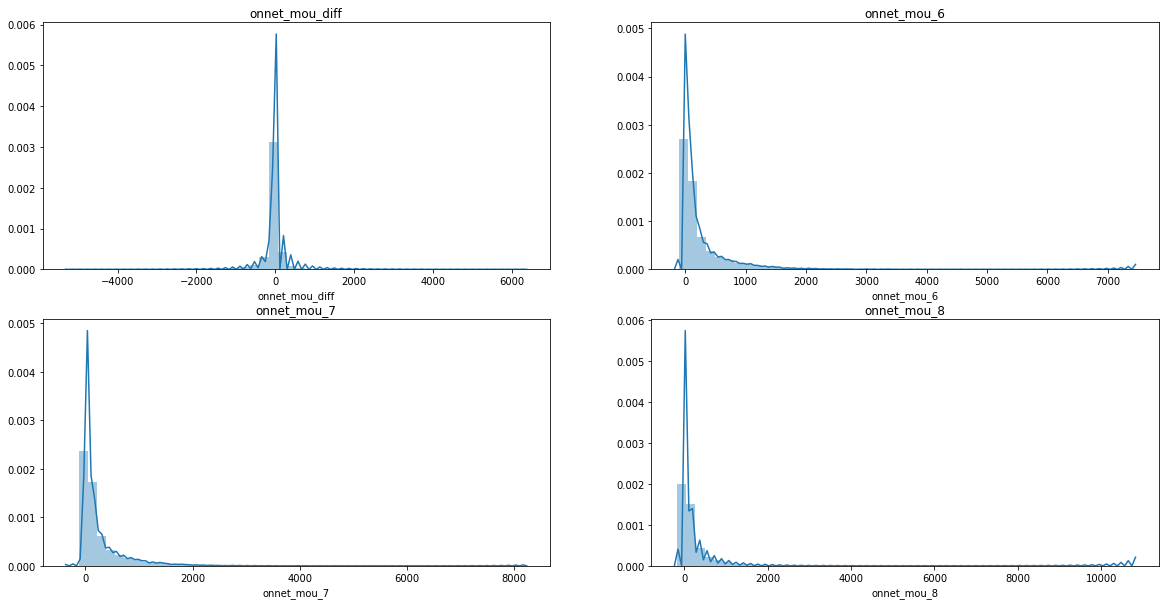

In [80]:
fig = plt.subplots(2, 2, figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(telecom_churn_data['onnet_mou_diff'])
plt.title('onnet_mou_diff')
plt.subplot(2,2,2)
sns.distplot(telecom_churn_data['onnet_mou_6'])
plt.title('onnet_mou_6')
plt.subplot(2,2,3)
sns.distplot(telecom_churn_data['onnet_mou_7'])
plt.title('onnet_mou_7')
plt.subplot(2,2,4)
sns.distplot(telecom_churn_data['onnet_mou_8'])
plt.title('onnet_mou_8')

It can be seen that all data are skewed towards left, including the difference between action phase and average of good phase.

#### offnet_mou_*

Text(0.5, 1.0, 'offnet_mou_8')

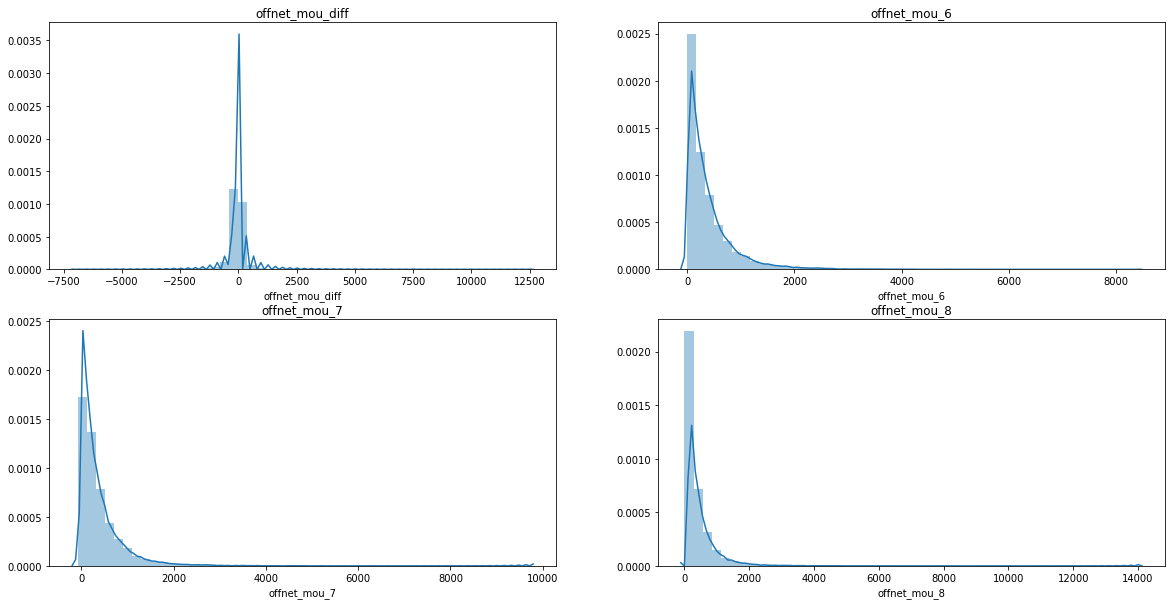

In [81]:
fig = plt.subplots(2, 2, figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(telecom_churn_data['offnet_mou_diff'])
plt.title('offnet_mou_diff')
plt.subplot(2,2,2)
sns.distplot(telecom_churn_data['offnet_mou_6'])
plt.title('offnet_mou_6')
plt.subplot(2,2,3)
sns.distplot(telecom_churn_data['offnet_mou_7'])
plt.title('offnet_mou_7')
plt.subplot(2,2,4)
sns.distplot(telecom_churn_data['offnet_mou_8'])
plt.title('offnet_mou_8')

It can be seen that all data are skewed towards left, including the difference between action phase and average of good phase.

#### total_ic_mou_*

Text(0.5, 1.0, 'total_ic_mou_8')

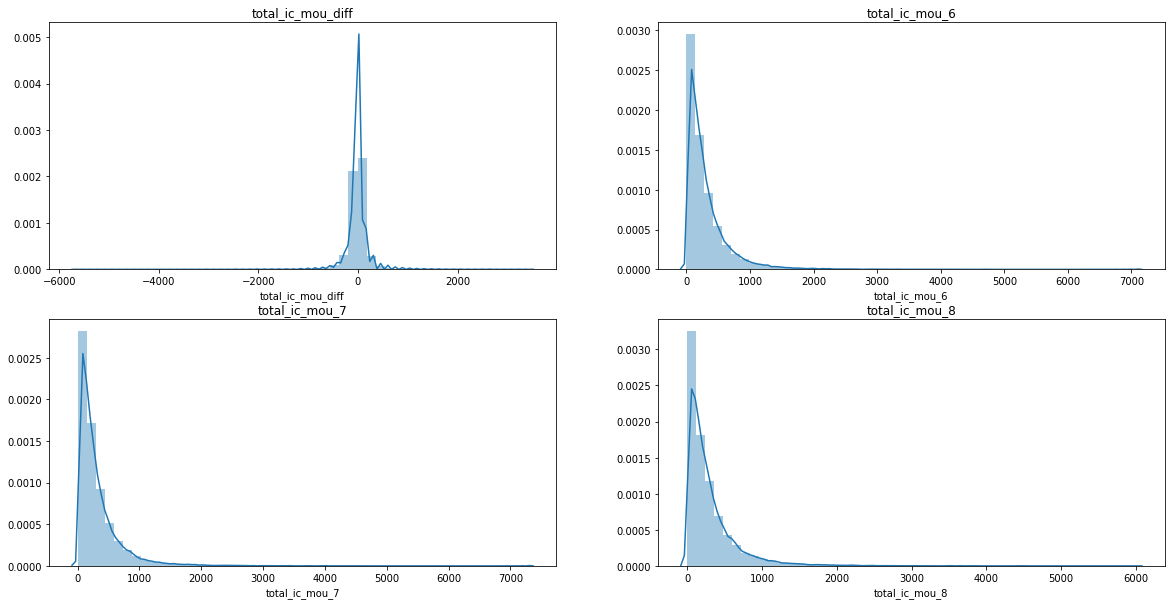

In [82]:
fig = plt.subplots(2, 2, figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(telecom_churn_data['total_ic_mou_diff'])
plt.title('total_ic_mou_diff')
plt.subplot(2,2,2)
sns.distplot(telecom_churn_data['total_ic_mou_6'])
plt.title('total_ic_mou_6')
plt.subplot(2,2,3)
sns.distplot(telecom_churn_data['total_ic_mou_7'])
plt.title('total_ic_mou_7')
plt.subplot(2,2,4)
sns.distplot(telecom_churn_data['total_ic_mou_8'])
plt.title('total_ic_mou_8')

It can be seen that all data are skewed towards left, including the difference between action phase and average of good phase.

#### total_og_mou_*

Text(0.5, 1.0, 'total_og_mou_8')

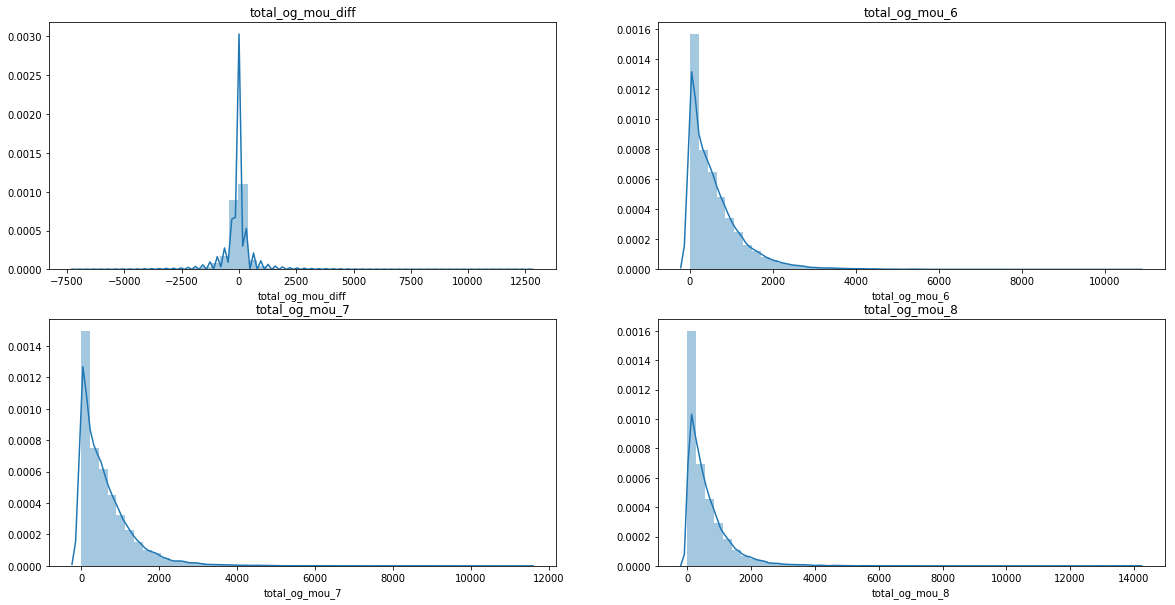

In [83]:
fig = plt.subplots(2, 2, figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(telecom_churn_data['total_og_mou_diff'])
plt.title('total_og_mou_diff')
plt.subplot(2,2,2)
sns.distplot(telecom_churn_data['total_og_mou_6'])
plt.title('total_og_mou_6')
plt.subplot(2,2,3)
sns.distplot(telecom_churn_data['total_og_mou_7'])
plt.title('total_og_mou_7')
plt.subplot(2,2,4)
sns.distplot(telecom_churn_data['total_og_mou_8'])
plt.title('total_og_mou_8')

It can be seen that all data are skewed towards left, including the difference between action phase and average of good phase.

#### vol_2g_mb_*

Text(0.5, 1.0, 'vol_2g_mb_8')

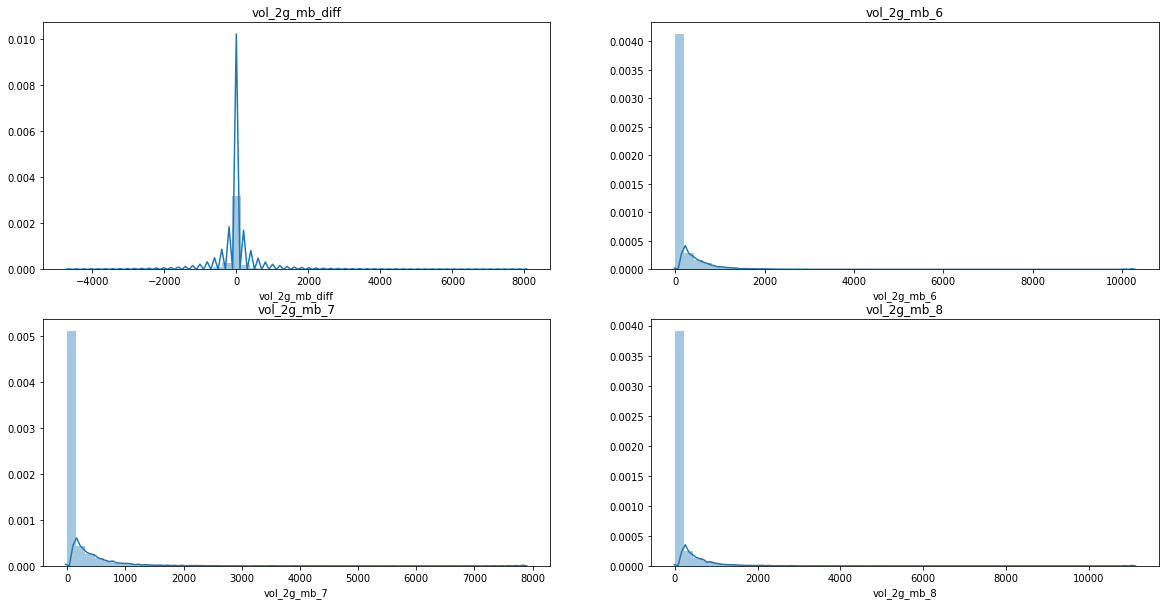

In [84]:
fig = plt.subplots(2, 2, figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(telecom_churn_data['vol_2g_mb_diff'])
plt.title('vol_2g_mb_diff')
plt.subplot(2,2,2)
sns.distplot(telecom_churn_data['vol_2g_mb_6'])
plt.title('vol_2g_mb_6')
plt.subplot(2,2,3)
sns.distplot(telecom_churn_data['vol_2g_mb_7'])
plt.title('vol_2g_mb_7')
plt.subplot(2,2,4)
sns.distplot(telecom_churn_data['vol_2g_mb_8'])
plt.title('vol_2g_mb_8')

It can be seen that all data are skewed towards left, including the difference between action phase and average of good phase.

#### vol_3g_mb_*

Text(0.5, 1.0, 'vol_3g_mb_8')

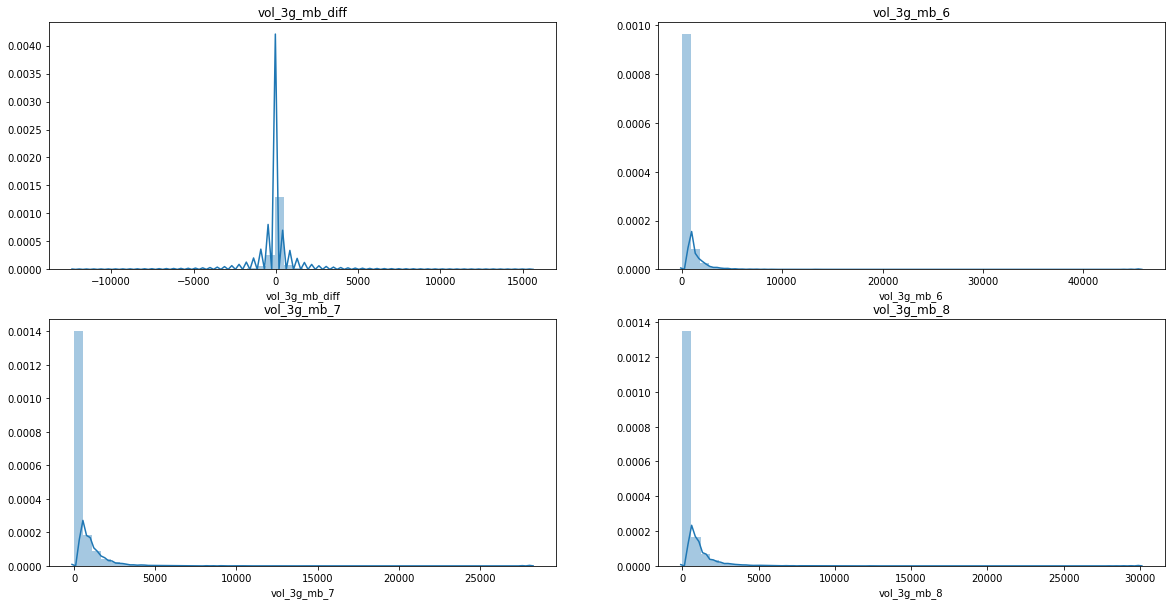

In [85]:
fig = plt.subplots(2, 2, figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(telecom_churn_data['vol_3g_mb_diff'])
plt.title('vol_3g_mb_diff')
plt.subplot(2,2,2)
sns.distplot(telecom_churn_data['vol_3g_mb_6'])
plt.title('vol_3g_mb_6')
plt.subplot(2,2,3)
sns.distplot(telecom_churn_data['vol_3g_mb_7'])
plt.title('vol_3g_mb_7')
plt.subplot(2,2,4)
sns.distplot(telecom_churn_data['vol_3g_mb_8'])
plt.title('vol_3g_mb_8')

It can be seen that all data are skewed towards left, including the difference between action phase and average of good phase.

#### Bivariate Analysis

#### aon_years

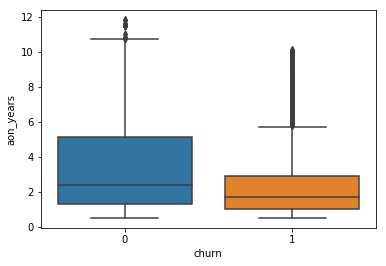

In [86]:
sns.boxplot(telecom_churn_data['churn'], telecom_churn_data['aon_years'])

It can be seen that the as the number of years are increasing, the rate of churn is less.

#### sachet_3g_*

In [87]:
pd.crosstab(telecom_churn_data.churn, telecom_churn_data.sachet_3g_6)

sachet_3g_6,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,21.0,22.0,23.0,28.0,29.0
churn,,,,,,,,,,,,,,,,,,,,,,,,,
0,24834,1728,413,160,76,48,31,36,18,17,8,10,4,3,4,5,2,1,3,3,1,3,2,1,2
1,2369,127,26,10,12,3,6,5,1,4,4,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [88]:
pd.crosstab(telecom_churn_data.churn, telecom_churn_data.sachet_3g_7)

sachet_3g_7,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,24.0,31.0,33.0,35.0
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24313,1967,523,204,114,91,60,30,18,16,11,12,12,5,7,7,2,1,5,4,3,2,3,1,1,1,0
1,2324,152,37,17,11,9,4,3,1,4,2,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [89]:
pd.crosstab(telecom_churn_data.churn, telecom_churn_data.sachet_3g_8)

sachet_3g_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,23.0,25.0,27.0,29.0,30.0,38.0,41.0
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24835,1589,402,183,106,90,44,36,28,19,15,8,12,10,6,7,2,2,3,1,3,3,2,1,1,1,2,1,1
1,2492,51,7,8,4,2,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Most of the customers have not opted for Service schemes with validity smaller than a month.

### Remove Outliers

We need to remove outliers from the data as the outliers can affect the modelling.

In [90]:
# Check for the outliers

telecom_churn_data.describe(percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,onnet_mou_diff,offnet_mou_diff,total_og_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,aon_years
count,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982

As it can be found that many columns have outliers. Therefore we need to either remove the outliers or replace value for those outliers. Removing the outliers may lead to loosing many observations as outliers are present in different columns. Our approach is to identify the outlier points by any points that were above (Mean + 3 ∗ SD) and any points below (Mean - 3 ∗ SD) and replacing it with (Mean + 3 ∗ SD) for upper cut-off and (Mean - 3 ∗ SD) for lower cut-off.

In [91]:
# Replace the outliers with (Mean + 3 ∗ SD) and (Mean - 3 ∗ SD)

def replace_outliers(df):
    low = df.mean() - (3 * df.std())
    high = df.mean() + (3 * df.std())
    df[df < low] = low
    df[df > high] = high
    return df

In [92]:
# Replace the outliers for numeric columns 
# Except categorical columns 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn'

cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']
num_cols = [col for col in telecom_churn_data.columns if col not in cat_cols]

telecom_churn_data[num_cols] = telecom_churn_data[num_cols].apply(replace_outliers, axis = 0)

In [93]:
# Check if the outliers are replaced

telecom_churn_data.describe(percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,onnet_mou_diff,offnet_mou_diff,total_og_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,aon_years
count,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982.000000,29982

#### Encoding of Categorical Variable

Earlier we introduced a new field(-1) to the dataset to impute for the categorical column. Now we need to enocde the categorical columns. Here we will use Mean-target encoding where the mean of churn of each field is calculated and replaced.

In [94]:
# Find the mean of churn of each field for the categorical columns

print(telecom_churn_data.groupby('night_pck_user_6').churn.mean())
print(telecom_churn_data.groupby('night_pck_user_7').churn.mean())
print(telecom_churn_data.groupby('night_pck_user_8').churn.mean())
print(telecom_churn_data.groupby('fb_user_6').churn.mean())
print(telecom_churn_data.groupby('fb_user_7').churn.mean())
print(telecom_churn_data.groupby('fb_user_8').churn.mean())

night_pck_user_6
-1.0    0.106916
 0.0    0.065641
 1.0    0.091153
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.115282
 0.0    0.064642
 1.0    0.070681
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.128053
 0.0    0.050650
 1.0    0.035821
Name: churn, dtype: float64
fb_user_6
-1.0    0.106916
 0.0    0.096552
 1.0    0.063493
Name: churn, dtype: float64
fb_user_7
-1.0    0.115282
 0.0    0.100806
 1.0    0.061439
Name: churn, dtype: float64
fb_user_8
-1.0    0.128053
 0.0    0.189052
 1.0    0.029069
Name: churn, dtype: float64


In [95]:
map_cat_cols = {'night_pck_user_6' : {-1.0: 0.106916, 0.0: 0.065641, 1.0: 0.091153},
                'night_pck_user_7' : {-1.0: 0.115282, 0.0: 0.064642, 1.0: 0.070681},
                'night_pck_user_8' : {-1.0: 0.128053, 0.0: 0.050650, 1.0: 0.035821},
                'fb_user_6': {-1.0: 0.106916, 0.0: 0.096552, 1.0: 0.063493},
                'fb_user_7': {-1.0: 0.115282, 0.0: 0.100806, 1.0: 0.061439},
                'fb_user_8': {-1.0: 0.128053, 0.0: 0.189052, 1.0: 0.029069}
               }

telecom_churn_data.replace(map_cat_cols, inplace = True)

In [96]:
# Dataset Information

telecom_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29982 entries, 0 to 29981
Columns: 161 entries, arpu_6 to aon_years
dtypes: float64(160), int64(1)
memory usage: 36.8 MB


After Data Preparation, we can save the data. Then we can start Modelling.

In [97]:
#Save the data after data preparation

telecom_churn_data.to_csv('./telecom_churn_data_prepared.csv', index = False)

## Modelling

In [98]:
# Read the prepared data

telecom_churn_data = pd.read_csv('./telecom_churn_data_prepared.csv')

telecom_churn_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,onnet_mou_diff,offnet_mou_diff,total_og_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,aon_years
0,197.385,214.816,213.803000,-68.82812,-49.315162,0.00,77.498123,59.678282,0.00,13.144898,7.546213,0.00,-0.70024,-7.823041,0.00,-6.804505,-11.006108,0.00,40.131691,39.289225,0.00,0.005792,-0.001042,0.00,0.322165,-1.448508,0.00,29.504867,25.198429,0.00,-2.925889,-3.343345,0.00,3.627111,3.219093,0.00,-0.010263,0.024233,0.00,-0.735968,-1.15371,0.00,-28.173757,-23.565871,0.00,-0.001994,-0.001504,0.00,-0.002779,0.004334,0.0,0.00,0.00,0.00,-12.932124,-14.835197,0.16,55.285293,55.661108,4.13,0.804032,0.838433,1.15,41.589126,40.403103,5.44,-10.558829,-10.801857,0.00,1.880666,1.860674,0.00,-0.000421,-0.000451,0.00,-9.309102,-9.448787,0.00,0.00,0.00,5.44,-12.872265,-11.194073,0.0,0.04507,-0.125319,0.00,-0.000156,-0.00018,0.00,4.0,3.0,2.0,362.0,252.0,252.000000,252.000000,252.000000,252.000000,252.0,252.0,252.000000,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.065641,0.064642,0.050650,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.063493,0.061439,0.029069,968.0,30.40,0.00,101.20,1,59.071641,-68.588202,0.000,5.440,-1.5,0.0,-9.975,-7.555,2.7
1,1069.180,1349.850,2011.642106,57.84000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.74000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.860000,75.14000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.

In [99]:
# Import libraries for modelling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics

### Train_Test_Split

In [100]:
# Putting feature variable to X

X = telecom_churn_data.drop(['churn'], axis=1)

X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,onnet_mou_diff,offnet_mou_diff,total_og_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,aon_years
0,197.385,214.816,213.803000,-68.82812,-49.315162,0.00,77.498123,59.678282,0.00,13.144898,7.546213,0.00,-0.70024,-7.823041,0.00,-6.804505,-11.006108,0.00,40.131691,39.289225,0.00,0.005792,-0.001042,0.00,0.322165,-1.448508,0.00,29.504867,25.198429,0.00,-2.925889,-3.343345,0.00,3.627111,3.219093,0.00,-0.010263,0.024233,0.00,-0.735968,-1.15371,0.00,-28.173757,-23.565871,0.00,-0.001994,-0.001504,0.00,-0.002779,0.004334,0.0,0.00,0.00,0.00,-12.932124,-14.835197,0.16,55.285293,55.661108,4.13,0.804032,0.838433,1.15,41.589126,40.403103,5.44,-10.558829,-10.801857,0.00,1.880666,1.860674,0.00,-0.000421,-0.000451,0.00,-9.309102,-9.448787,0.00,0.00,0.00,5.44,-12.872265,-11.194073,0.0,0.04507,-0.125319,0.00,-0.000156,-0.00018,0.00,4.0,3.0,2.0,362.0,252.0,252.000000,252.000000,252.000000,252.000000,252.0,252.0,252.000000,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.065641,0.064642,0.050650,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.063493,0.061439,0.029069,968.0,30.40,0.00,101.20,59.071641,-68.588202,0.000,5.440,-1.5,0.0,-9.975,-7.555,2.7
1,1069.180,1349.850,2011.642106,57.84000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.74000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.860000,75.14000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.011341,1

In [101]:
# Putting target variable to y

y = telecom_churn_data['churn']

y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [102]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [103]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (20987, 160)
X_test shape: (8995, 160)
y_train shape: (20987,)
y_test shape: (8995,)


### Feature Scaling

In [104]:
# Scaling the data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,onnet_mou_diff,offnet_mou_diff,total_og_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,aon_years
0,-1.318668,-1.298806,-1.207279,-0.658506,-0.652113,-0.611156,-0.893252,-0.890896,-0.823335,-0.300774,-0.259667,-0.26853,-0.309105,-0.281676,-0.277708,-0.547988,-0.545454,-0.534388,-0.779248,-0.796969,-0.762552,-0.428401,-0.434263,-0.429606,-0.35453,-0.344456,-0.245141,-0.797018,-0.812657,-0.774382,-0.480666,-0.485094,-0.449662,-0.521441,-0.525069,-0.471559,-0.242506,-0.235694,-0.232538,-0.635390,-0.641970,-0.575461,-0.070644,-0.086512,-0.042635,-0.479744,-0.400142,-0.188976,-0.393992,-0.048619,-0.050779,-0.973154,-0.976304,-0.878470,-0.453613,-0.576358,-0.610053,-0.745666,-0.723797,-0.778248,-0.443625,-0.467575,-0.379321,-0.748647,-0.784046,-0.814498,1.017414,-0.048639,0.030976,0.127158,-0.233652,-0.432829,-0.267513,-0.272746,-0.261521,0.463228,-0.223148,-0.325179,-0.559710,-0.772058,-0.822172,0.185394,0.105250,0.153768,-0.248959,-0.261070,-0.256464,-0.207353,-0.070223,-0.218805,-0.544629,-0.321116,-0.716819,-1.241210,-1.258333,-1.158308,-1.028687,-1.064498,-1.006904,-0.668578,-0.772667,-0.645523,2.083158,1.592764,0.202101,-0.457804,-0.544428,-0.458037,2.585758,1.969330,-0.053872,-0.446915,-0.477541,0.787392,0.239691,0.069745,-0.403362,2.746246,1.554597,0.021813,-0.468636,-0.514781,-0.484858,-0.430529,-0.462335,-0.262400,-0.455733,-0.486200,-0.213252,-0.976807,-0.846845,-0.903053,-0.400755,-0.434872,-0.395246,2.691429,2.051627,0.020711,-0.381229,-0.404397,-0.383442,-0.282917,-0.304233,1.534036,-1.034694,-0.923929,-1.014976,-0.652297,-0.468955,-0.469273,-0.441554,0.127327,0.167555,0.179325,-0.247957,-0.386636,-2.192769,-2.701538,0.007666,-0.658378
1,3.167301,2.710007,1.619982,-0.325383,0.589559,-0.181093,3.604104,2.916172,1.609257,2.244401,3.316866,-0.2

In [105]:
# Scale the test data

X_test_scaled = scaler.transform(X_test)

X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,onnet_mou_diff,offnet_mou_diff,total_og_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,aon_years
0,-1.035089,-0.677116,-0.720613,-0.647591,-0.611737,-0.611156,-0.878737,-0.851014,-0.828080,-0.300774,-0.259667,-0.268530,-0.309105,-0.281676,-0.277708,-0.517577,-0.432660,-0.534388,-0.752010,-0.713299,-0.743184,-0.428401,-0.434263,-0.429606,-0.228316,-0.344456,-0.352918,-0.765627,-0.706680,-0.761714,-0.480666,-0.483612,-0.449662,-0.521441,-0.523173,-0.488660,-0.242506,-0.235694,-0.232538,-0.635390,-0.639927,-0.585476,-0.070644,-0.086512,-0.042635,-0.436619,-0.510846,-0.497673,-0.393992,-0.048619,-0.050779,-0.956913,-0.926669,-0.886780,-0.623357,-0.563386,-0.539054,-0.648706,-0.544952,-0.646834,-0.473464,-0.467575,-0.471950,-0.750300,-0.659375,-0.709697,-0.210452,0.556409,-0.345986,-0.461321,-0.428912,-0.400312,-0.267513,-0.272746,-0.261521,-0.443588,-0.098583,-0.457335,-0.805023,-0.635743,-0.769735,0.097739,0.10525,0.153768,-0.248959,-0.26107,-0.256464,-0.207353,-0.219105,-0.218805,-0.544629,0.650053,-0.223831,-0.990938,-0.680381,-0.697125,-0.905856,-0.944873,-0.882320,-0.668578,-0.914691,-0.445812,2.083158,0.829430,1.866016,-0.289575,-0.385835,-0.292583,0.511705,-0.580663,-0.533638,4.577425,4.131823,4.780692,0.643281,0.151814,0.804889,-0.313924,0.724651,0.708668,0.435811,0.058542,0.478058,0.693944,0.870083,1.305914,0.790699,0.962072,1.468690,-0.976807,-0.846845,-0.903053,-0.400755,-0.434872,-0.395246,0.599500,-0.499122,-0.463744,-0.381229,-0.404397,-0.383442,5.826822,5.553527,6.091243,-1.034694,-0.923929,-1.014976,-1.073248,0.375865,0.366919,0.760671,0.085319,0.120309,0.119684,-0.068367,-0.386636,0.619339,0.559363,0.349250,-1.077733
1,0.976308,0.925342,0.356605,-0.536390,-0.345832,-0.240588,0.889769,0.838457,0.177695,-0.300774,-0.259667,-0.268530,-0.3

### Model for Predicting the churn

### PCA

In [106]:
# Apply PCA

pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Check the screeplot to assess the number of needed principal components

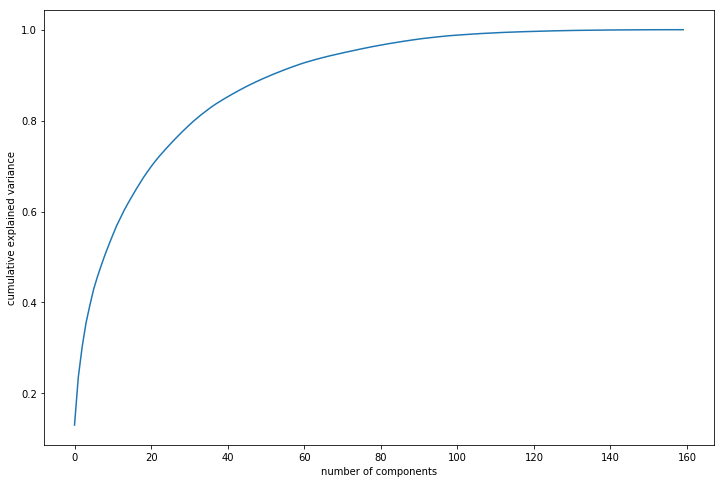

In [107]:
# Make the screeplot - plotting the cumulative variance against the number of components

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

It can be found from the Screeplot that the around 60 components explain more than 90% variance, so we can use 60 components for our modelling. 
<br>
Here we can use Incremental PCA for efficiency as it saves a lot of time on larger datasets

In [108]:
# Apply Incremental PCA 

pca_final = IncrementalPCA(n_components = 60)

In [109]:
# Basis transformation - getting the data onto the Principal Componentss

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20987, 60)

We need to check that correlations are indeed very close to 0 to avoid multicollinearity.

In [110]:
#creating correlation matrix for the principal components

corrmat = np.corrcoef(df_train_pca.transpose())

# 1s -> 0s in diagonals

corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())

print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.0037634795075388184 , min corr:  -0.006284902833050317


### Logistic Regression with PCA

In [111]:
# Train the model on the PCA train data

lr_pca = LogisticRegression(class_weight='balanced')
model_lr_pca = lr_pca.fit(df_train_pca,y_train)

#### Evaluate on test data

In [112]:
# Apply the PCA

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8995, 60)

In [113]:
# Predict the churn on test data

y_pred = model_lr_pca.predict(df_test_pca)

In [114]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6775 1436]
 [ 150  634]]


In [115]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8211
           1       0.31      0.81      0.44       784

    accuracy                           0.82      8995
   macro avg       0.64      0.82      0.67      8995
weighted avg       0.92      0.82      0.86      8995



In [116]:
# AUC Score

y_pred_probs = model_lr_pca.predict_proba(df_test_pca)[:,1]
print("AUC : {:2.2f}".format(metrics.roc_auc_score(y_test, y_pred_probs)))

AUC : 0.88


The Logistic Regression model with PCA provides 82% accuracy, 81% recall score and 88% AUC score. Therefore this model can be used to predict the customer churn. However we will do hypertuning to check whether the model can be improved.

### Logistic Regression with PCA - Hyperparameter Tuning

#### StratifiedKFold

In [117]:
# creating a StratifiedKFold object with 5 splits 

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 20)

In [118]:
# Calculate the class imbalance

y.value_counts()/y.shape

0    0.914315
1    0.085685
Name: churn, dtype: float64

In [119]:
# Hyperparameters

params = {'C':[0.0001,0.001,0.005,0.1,0.2,0.3,0.4,0.5,1,2], 
          'penalty':['l1','l2'], 
          'class_weight':['balanced', {0:0.1, 1:0.9}]}

# Create model

logreg_pca = LogisticRegression()

# Create GridSearch 

grid_model_lr_pca = GridSearchCV(estimator=logreg_pca, 
                                 cv = folds, 
                                 param_grid=params, 
                                 scoring='roc_auc',
                                 return_train_score=True,
                                 n_jobs=-1, 
                                 verbose=1)

In [120]:
# Fit model
grid_model_lr_pca.fit(df_train_pca, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   10.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 1,
                               2],
                         'class_weight': ['balanced', {0: 0.1, 1: 0.9}],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=

In [121]:
# Best params
print('Best params: %s' % grid_model_lr_pca.best_params_)

# Best training data accuracy
print('Best AUC: %.3f' % round(grid_model_lr_pca.best_score_*100,2))

Best params: {'C': 0.005, 'class_weight': 'balanced', 'penalty': 'l2'}
Best AUC: 87.420


In [122]:
# Initialize the Logistic Regression model with best parameters

logreg_pca_final = LogisticRegression(C = 0.005, class_weight = 'balanced', penalty = 'l2')

In [123]:
# Fit the model

logreg_pca_final.fit(df_train_pca, y_train)

LogisticRegression(C=0.005, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
# Predict the churn on test data

y_pred = logreg_pca_final.predict(df_test_pca)

In [125]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6784 1427]
 [ 149  635]]


In [126]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8211
           1       0.31      0.81      0.45       784

    accuracy                           0.82      8995
   macro avg       0.64      0.82      0.67      8995
weighted avg       0.92      0.82      0.86      8995



In [127]:
# AUC Score

y_pred_probs = logreg_pca_final.predict_proba(df_test_pca)[:,1]
print("AUC : {:2.2f}".format(metrics.roc_auc_score(y_test, y_pred_probs)))

AUC : 0.88


The Logistic Regression model with PCA - Hyperparameter tuning provides 82% accuracy, 81% recall score and 88% AUC score. Therefore this model can be used to predict the customer churn. However we will do modelling using other models.

### Decision Tree with PCA

In [128]:
# Train the model on the PCA train data

dt_pca = DecisionTreeClassifier(max_depth = 5, class_weight = 'balanced')
model_dt_pca = dt_pca.fit(df_train_pca,y_train)

#### Evaluate on test data

In [129]:
# Predict the churn on test data

y_pred = model_dt_pca.predict(df_test_pca)

In [130]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6645 1566]
 [ 233  551]]


In [131]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8211
           1       0.26      0.70      0.38       784

    accuracy                           0.80      8995
   macro avg       0.61      0.76      0.63      8995
weighted avg       0.90      0.80      0.84      8995



In [132]:
# AUC Score

y_pred_probs = model_dt_pca.predict_proba(df_test_pca)[:,1]
print("AUC : {:2.2f}".format(metrics.roc_auc_score(y_test, y_pred_probs)))

AUC : 0.82


The Decision Tree model with PCA provides 80% accuracy, 70% recall score and 82% AUC score. Though Logistic Regression model with PCA is better with respect to the results, this model can be used to predict the customer churn. However we will do hypertuning to check whether the model can be improved.

### Decision Tree with PCA - Hyperparameter Tuning

In [133]:
# Hyperparameters

params = {'class_weight': ['balanced', {0:0.1, 1:0.9}],
          'max_depth': range(5, 15, 5),
          'min_samples_leaf': range(50, 150, 50),
          'min_samples_split': range(50, 150, 50),
          'criterion': ["entropy", "gini"]}

# Create model

dt_pca_grid = DecisionTreeClassifier()

# Create GridSearch 

grid_model_dt_pca = GridSearchCV(estimator=dt_pca_grid, 
                                 cv = folds, 
                                 param_grid=params, 
                                 scoring='roc_auc',
                                 return_train_score=True,
                                 n_jobs=-1, 
                                 verbose=1)

In [134]:
# Fit model
grid_model_dt_pca.fit(df_train_pca, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   39.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
          

In [135]:
# Best params
print('Best params: %s' % grid_model_dt_pca.best_params_)

# Best training data accuracy
print('Best AUC: %.3f' % round(grid_model_dt_pca.best_score_*100,2))

Best params: {'class_weight': {0: 0.1, 1: 0.9}, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}
Best AUC: 82.970


In [136]:
# Initialize the Decision Tree model with best parameters

dt_pca_final = DecisionTreeClassifier(class_weight = {0: 0.1, 1: 0.9},
                                      criterion = 'entropy', 
                                      max_depth = 10, 
                                      min_samples_leaf = 100, 
                                      min_samples_split = 100)

In [137]:
# Fit the model

dt_pca_final.fit(df_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.1, 1: 0.9},
                       criterion='entropy', max_depth=10, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [138]:
# Predict the churn on test data

y_pred = dt_pca_final.predict(df_test_pca)

In [139]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6825 1386]
 [ 238  546]]


In [140]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      8211
           1       0.28      0.70      0.40       784

    accuracy                           0.82      8995
   macro avg       0.62      0.76      0.65      8995
weighted avg       0.91      0.82      0.85      8995



In [141]:
# AUC Score

y_pred_probs = dt_pca_final.predict_proba(df_test_pca)[:,1]
print("AUC : {:2.2f}".format(metrics.roc_auc_score(y_test, y_pred_probs)))

AUC : 0.83


The Decision Tree model with PCA - Hyperparameter tuning provides 82% accuracy, 70% recall score and 83% AUC score. Therefore this model can be used to predict the customer churn. However we will do modelling using other models.

### Random Forest with PCA

In [142]:
# Train the model on the PCA train data

rf_pca = RandomForestClassifier(class_weight = 'balanced')
model_rf_pca = rf_pca.fit(df_train_pca,y_train)

#### Evaluate on test data

In [143]:
# Predict the churn on test data

y_pred = model_rf_pca.predict(df_test_pca)

In [144]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8155   56]
 [ 659  125]]


In [145]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8211
           1       0.69      0.16      0.26       784

    accuracy                           0.92      8995
   macro avg       0.81      0.58      0.61      8995
weighted avg       0.90      0.92      0.90      8995



In [146]:
# AUC Score

y_pred_probs = model_rf_pca.predict_proba(df_test_pca)[:,1]
print("AUC : {:2.2f}".format(metrics.roc_auc_score(y_test, y_pred_probs)))

AUC : 0.86


The Random Forest model with PCA provides 92% accuracy, 16% recall score and 86% AUC score. The Recall score is very less so we will do hypertuning to check whether the model can be improved.

### Random Forest with PCA - Hyperparameter Tuning

In [153]:
# Hyperparameters

params = {'max_depth': [10,12],
          'min_samples_leaf': range(150, 250, 50),
          'min_samples_split': range(200, 400, 100),
          'n_estimators': [300,500], 
          'max_features': [15, 20]}

# Create model

rf_pca_grid = RandomForestClassifier(class_weight = 'balanced')

# Create GridSearch 

grid_model_rf_pca = GridSearchCV(estimator=rf_pca_grid, 
                                 cv = 3, 
                                 param_grid=params, 
                                 scoring='roc_auc',
                                 return_train_score=True,
                                 n_jobs=-1, 
                                 verbose=1)

In [154]:
# Fit model
grid_model_rf_pca.fit(df_train_pca, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 18.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [155]:
# Best params
print('Best params: %s' % grid_model_rf_pca.best_params_)

# Best training data accuracy
print('Best AUC: %.3f' % round(grid_model_rf_pca.best_score_*100,2))

Best params: {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 300}
Best AUC: 87.100


In [156]:
# Initialize the Random Forest model with best parameters

rf_pca_final = RandomForestClassifier(class_weight = 'balanced',
                                      max_depth = 10, 
                                      max_features = 15,
                                      min_samples_leaf = 150, 
                                      min_samples_split = 300, 
                                      n_estimators = 300)

In [157]:
# Fit the model

rf_pca_final.fit(df_train_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [158]:
# Predict the churn on test data

y_pred = rf_pca_final.predict(df_test_pca)

In [159]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7073 1138]
 [ 206  578]]


In [160]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8211
           1       0.34      0.74      0.46       784

    accuracy                           0.85      8995
   macro avg       0.65      0.80      0.69      8995
weighted avg       0.92      0.85      0.87      8995



In [161]:
# AUC Score

y_pred_probs = rf_pca_final.predict_proba(df_test_pca)[:,1]
print("AUC : {:2.2f}".format(metrics.roc_auc_score(y_test, y_pred_probs)))

AUC : 0.87


The Random Forest model with PCA - Hyperparameter tuning provides 85% accuracy, 74% recall score and 87% AUC score. Therefore this model can be used to predict the customer churn. However we will do modelling using other models.

### XGBoost with PCA

In [162]:
# Train the model on the PCA train data

xgb_pca = XGBClassifier()
model_xgb_pca = xgb_pca.fit(df_train_pca,y_train)

#### Evaluate on test data

In [163]:
# Predict the churn on test data

y_pred = model_rf_pca.predict(df_test_pca)

In [164]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8155   56]
 [ 659  125]]


In [165]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8211
           1       0.69      0.16      0.26       784

    accuracy                           0.92      8995
   macro avg       0.81      0.58      0.61      8995
weighted avg       0.90      0.92      0.90      8995



In [166]:
# AUC Score

y_pred_probs = model_rf_pca.predict_proba(df_test_pca)[:,1]
print("AUC : {:2.2f}".format(metrics.roc_auc_score(y_test, y_pred_probs)))

AUC : 0.86


The XGBoost Classifier model with PCA provides 92% accuracy, 16% recall score and 86% AUC score. Though Logistic Regression model with PCA is better with respect to the results(low sensitivity), this model can be used to predict the customer churn. However we will do hypertuning to check whether the model can be improved.

### XGBoostClassifier with PCA - Hyperparameter Tuning

In [167]:
# Hyperparameters

params = {'learning_rate': [0.2, 0.6], 
          'subsample': [0.3, 0.6, 0.9]}

# Create model

xgb_pca_grid = XGBClassifier(max_depth=2, n_estimators=200)

# Create GridSearch 

grid_model_xgb_pca = GridSearchCV(estimator=xgb_pca_grid, 
                                 cv = folds, 
                                 param_grid=params, 
                                 scoring='roc_auc',
                                 return_train_score=True,
                                 n_jobs=-1, 
                                 verbose=1)

In [168]:
# Fit model
grid_model_xgb_pca.fit(df_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},

In [169]:
# Best params
print('Best params: %s' % grid_model_xgb_pca.best_params_)

# Best training data accuracy
print('Best AUC: %.3f' % round(grid_model_xgb_pca.best_score_*100,2))

Best params: {'learning_rate': 0.2, 'subsample': 0.9}
Best AUC: 88.000


In [170]:
# Initialize the XGBoost model with best parameters

xgb_pca_final = XGBClassifier(max_depth=2, n_estimators=200, learning_rate = 0.2, subsample = 0.9)

In [171]:
# Fit the model

xgb_pca_final.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [172]:
# Predict the churn on test data

y_pred = xgb_pca_final.predict(df_test_pca)

In [173]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8081  130]
 [ 531  253]]


In [174]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8211
           1       0.66      0.32      0.43       784

    accuracy                           0.93      8995
   macro avg       0.80      0.65      0.70      8995
weighted avg       0.91      0.93      0.91      8995



In [175]:
# AUC Score

y_pred_probs = xgb_pca_final.predict_proba(df_test_pca)[:,1]
print("AUC : {:2.2f}".format(metrics.roc_auc_score(y_test, y_pred_probs)))

AUC : 0.88


The XGBoostClassifier model with PCA - Hyperparameter tuning provides 93% accuracy, 32% recall score and 88% AUC score. This model seems not to be used for predicting the customer churn as it has low sensitivity.

From the above models and their results, it can be said that the Logistic Regression model with PCA can be used for predicting the customer churn. As a second choice, Random Forest model with PCA with Hyperparameter tuning can be used for prediction of customer churn.

###  Model for identifying the Important Variables

We need to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks. Here we can use the Random Forest Model with train data without PCA to identify the important features. 

### Random Forest Model

First we will train Random Forest Model on the train data without PCA to find the important features.

In [176]:
# Hyperparameter Tuning for Random Forest Model without PCA

params = {'max_depth': [10,12],
          'min_samples_leaf': range(150, 250, 50),
          'min_samples_split': range(200, 400, 100),
          'n_estimators': [500,1000], 
          'max_features': [15, 20]
         }

# Create a based model

rf_feature = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf_feature, param_grid = params, scoring='roc_auc',
                          cv = 3, verbose = 1, n_jobs=-1)

In [177]:
# Fit the model

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 17.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [178]:
# Best params
print('Best params: %s' % grid_search.best_params_)

# Best training data accuracy
print('Best AUC: %.3f' % round(grid_search.best_score_*100,2))

Best params: {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 500}
Best AUC: 89.720


In [179]:
# Train Random Forest Model on th Train data without PCA

rf_model_feature = RandomForestClassifier(n_estimators=500, 
                                          class_weight='balanced', 
                                          max_depth = 10, 
                                          max_features = 20, 
                                          min_samples_leaf = 150, 
                                          min_samples_split = 300,
                                          oob_score = True, 
                                          random_state=4, 
                                          verbose=1)

In [180]:
# Fit the model

rf_model_feature.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   43.5s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=4, verbose=1,
                       warm_start=False)

In [181]:
# OOB Score

rf_model_feature.oob_score_

0.8705865535807881

In [182]:
# Predict the churn on test data

y_pred = rf_model_feature.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


In [183]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7281  930]
 [ 172  612]]


In [184]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      8211
           1       0.40      0.78      0.53       784

    accuracy                           0.88      8995
   macro avg       0.69      0.83      0.73      8995
weighted avg       0.93      0.88      0.89      8995



In [185]:
# AUC Score

y_pred_probs = rf_model_feature.predict_proba(X_test)[:,1]
print("AUC : {:2.2f}".format(metrics.roc_auc_score(y_test, y_pred_probs)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AUC : 0.91


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


The Random Forest model provides 88% accuracy, 78% recall score and 91% AUC score. As this model seems to be a good one for predicting the customer churn, we can check for the important features from Random Forest model.

In [186]:
# Feature Importance
importance = pd.DataFrame({'Features': X_train.columns, 
                           'Importance':  rf_model_feature.feature_importances_ * 100}).sort_values('Importance', 
                                                                                                    ascending = False)
importance.head()

,Features,Importance
80,total_ic_mou_8,9.921008
65,loc_ic_mou_8,8.393440
56,loc_ic_t2t_mou_8,7.196601
101,last_day_rch_amt_8,6.428826
95,total_rech_amt_8,5.763146


We can filter out the first 20 features with highest importance.

In [187]:
# First 20 important features

cols = importance.Features[0:20].to_list()
cols

['total_ic_mou_8',
 'loc_ic_mou_8',
 'loc_ic_t2t_mou_8',
 'last_day_rch_amt_8',
 'total_rech_amt_8',
 'total_og_mou_diff',
 'total_og_mou_8',
 'loc_og_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_ic_t2m_mou_8',
 'arpu_8',
 'av_rech_amt_data_8',
 'loc_og_t2t_mou_8',
 'total_ic_mou_diff',
 'max_rech_amt_8',
 'vol_2g_mb_8',
 'loc_og_t2m_mou_8',
 'offnet_mou_diff',
 'total_rech_num_diff']

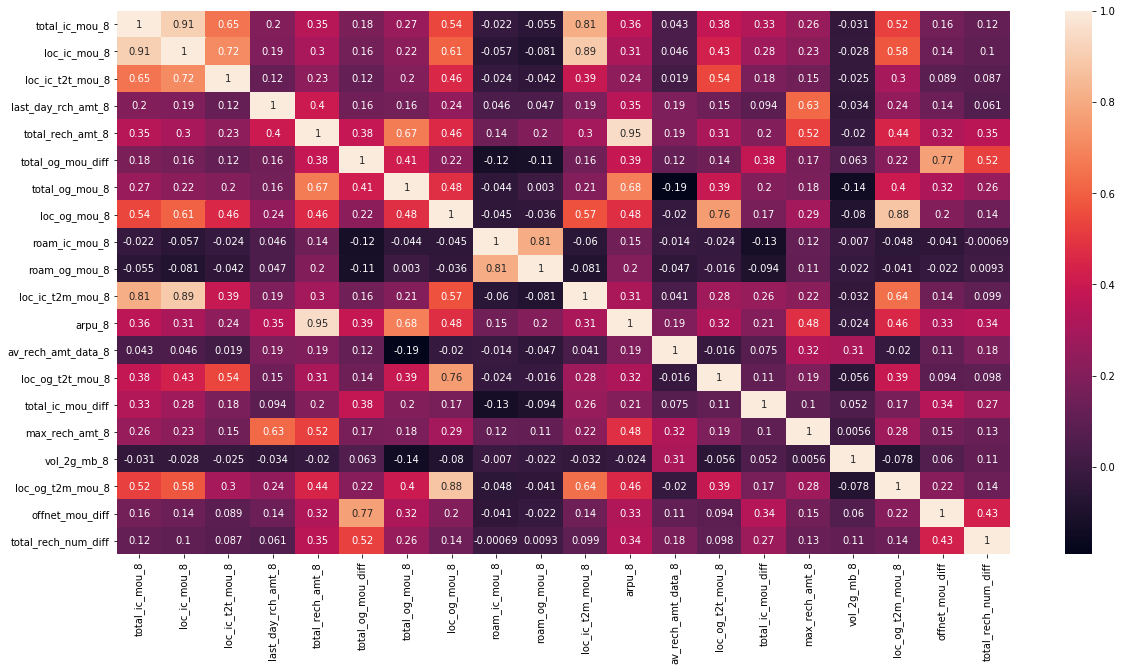

In [188]:
# Plot the correlation matrix for the first 20 highest important features

plt.figure(figsize= (20,10))
sns.heatmap(X_train[cols].corr(),annot=True)

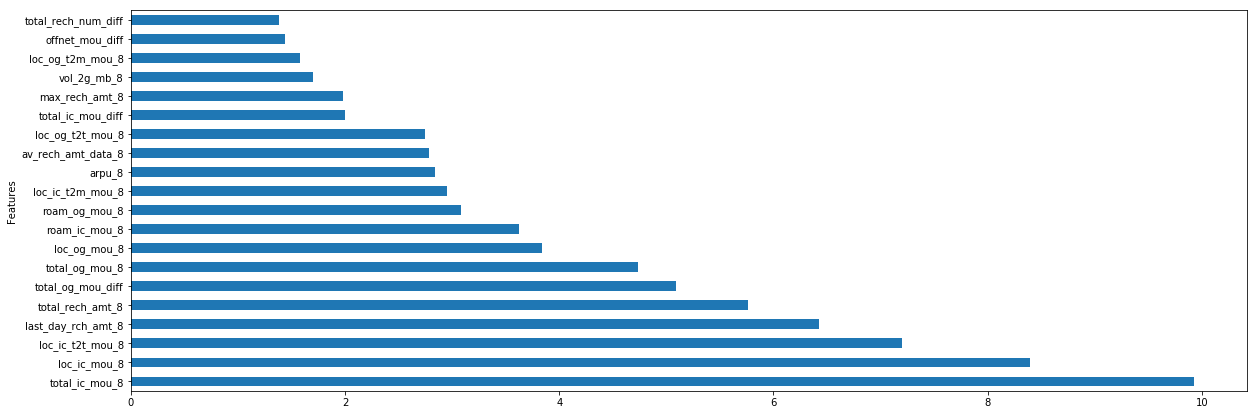

In [189]:
# Plot the important features

fi = importance[0:20]
fi.plot('Features','Importance','barh', figsize=(20,7), legend=False)

We will fiter out the 20 important features and build a model again.

In [190]:
# Filter the train and test data with 20 features

X_tr = X_train[cols]
X_te = X_test[cols]

In [191]:
# Fit the model

rf_model_feature.fit(X_tr, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.0min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=4, verbose=1,
                       warm_start=False)

In [192]:
# OOB Score

rf_model_feature.oob_score_

0.8493829513508362

In [193]:
# Predict the churn on test data

y_pred = rf_model_feature.predict(X_te)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


In [194]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7080 1131]
 [ 153  631]]


In [195]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      8211
           1       0.36      0.80      0.50       784

    accuracy                           0.86      8995
   macro avg       0.67      0.83      0.71      8995
weighted avg       0.92      0.86      0.88      8995



In [196]:
# AUC Score

y_pred_probs = rf_model_feature.predict_proba(X_te)[:,1]
print("AUC : {:2.2f}".format(metrics.roc_auc_score(y_test, y_pred_probs)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AUC : 0.90


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


The Random Forest model with 20 important features provides 86% accuracy, 80% recall score and 90% AUC score. This model seems to be a good one for predicting the customer churn.

#### Observations and Recommendations

Logistic Regression Model with PCA seems to the best model for predicting the customer churn. As a second choice, Hyperparameter tuned Random Forest can be used for Prediction.
<BR>
Random Forest Model with 20 important features can be used for identifying the important variables.  
<BR>
From Random Forest Model with 20 important features, `Total Incoming calls`, `Local Incoming calls`, `Total Outgoing calls`, `Local Outgoing calls`, `Roaming Incoming calls`, `Roaming Outgoing calls`, `2G Mobile Internet`, `Average Revenue Per Customer`, `Total Recharge Amount`, `Maximum Recharge Amount` for `Month 8(September - Action Phase)` are the most important predictor variables to predict churn.
<BR>
From the above, we can clearly observe that incoming and outgoing calls is key for identifying churn customers. The usage during the action phase is key for identifying churn customers.
<BR>  
Age on network is also a key indicator for identifying the churn. As the days increases,the customer is going to be churned is reduced.
<BR><BR>
Telecom company needs to provide good offers and packages on roaming rates and local rates with the same operator and other mobile operators.
<BR> Above all it would be a option good that the telecom company collects Customer Feedback and then optimise their services.